<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">
   Microsoft malware detection
</div>



__Goal:__ Predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. It is really important to find out whether the computer is infected and cure it.

from IPython.display import HTML

HTML("""
<a href="https://www.kaggle.com/c/microsoft-malware-prediction" target="_blank">
    <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/10683/logos/thumb76_76.png?t=2018-09-19-16-55-15"
         alt="Microsoft Malware Detection"
         width="76"/>
</a>
""")



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import time
import datetime


import gc
import warnings
from   tqdm import tqdm_notebook
import tqdm

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.style.use('ggplot')

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">
    2. Data Overview
</div>


The objective of this section is to:

Load the malware dataset

Perform an initial exploration of the available features

Since the dataset is very large, we will load only a subset of the data. Specifically, we will read 4,000,000 rows of the malware dataset using pd.read_csv() to make analysis more manageable.

Due to large size of the dataset i am pasting the link ref> https://www.kaggle.com/competitions/microsoft-malware-prediction/data
    

In [2]:
%%time
n_rows = 400000
malware_df = pd.read_csv(r"malware_df/train.csv",nrows=n_rows,low_memory=False)

CPU times: total: 5.8 s
Wall time: 5.81 s


In [3]:
malware_df.sample(6)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
67710,01f45175879f187ff46b5271485f339a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1707.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,97,131947.0,27.0,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2206.0,251903.0,4.0,5.0,2827.0,NaN,244198.0,SSD,243582.0,0,16384.0,MiniTower,13.3,1024.0,768.0,Workstation,NaN,4.294967e+09,10.0.17134.191,amd64,rs4_release,17134,191,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,500.0,41115.0,0,NaN,0.0,0,0,0.0,0.0,13.0,1
204840,05e521e654450bbe9b513eeb9411a97e,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1094.0,0,7.0,0,NaN,46669.0,2.0,1.0,1,60,166848.0,27.0,240.0,233,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,0.0,108.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189460.0,4.0,5.0,2660.0,NaN,953869.0,HDD,953252.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,9.0,34,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,556.0,63155.0,1,0.0,0.0,0,0,0.0,0.0,15.0,0
186567,055f05c85f2016c2a97b4bc7e2bea260,win8defender,1.1.15100.1,4.18.1807.18075,1.273.894.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,143120.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,0.0,117.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,35065.0,4.0,5.0,2288.0,NaN,953869.0,HDD,153600.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,NaN,0.000000e+00,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,12951.0,0,NaN,0.0,0,0,0.0,0.0,10.0,1
223148,066b09b3da76f5aafccc364a494ffe9e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.101.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,12607.0,27.0,53.0,42,windows10,x64,10.0.0.0,16299,256,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Pro,1.0,0,NaN,0.0,117.0,ExistsNotSet,1.0,1.0,Convertible,Windows.Desktop,3150.0,313500.0,4.0,5.0,2703.0,NaN,122104.0,SSD,119985.0,0,8192.0,Laptop,13.5,3000.0,2000.0,Slate,NaN,1.000

In [4]:
malware_df.isnull().sum()

MachineIdentifier                                         0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                       1490
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            380697
AVProductStatesIdentifier                              1624
AVProductsInstalled                                    1624
AVProductsEnabled                                      1624
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        14525
OrganizationIdentifier                               123314
GeoNameIdentifier                       


<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Data Description</div>


The dataset consists of telemetry information collected by Microsoft’s endpoint protection system, Windows Defender. This data is generated by combining heartbeat reports and threat detection reports, along with information about malware infections observed on individual machines.

Each row in the dataset represents a single machine, uniquely identified by a MachineIdentifier. The target variable, HasDetections, serves as the ground-truth label and indicates whether malware was detected on that machine.

To satisfy business constraints, including user privacy and time-based considerations, the dataset was created using a specific sampling strategy. Although malware detection is inherently a time-series problem, it is complicated by factors such as machines frequently going online or offline, receiving system updates or patches, and upgrading operating systems. Additionally, this dataset does not reflect the true distribution of Microsoft customer devices in the real world, as it intentionally contains a higher proportion of malware-infected machines to support effective model training.

Some feature names are either unavailable or self-explanatory and are therefore marked as “NA”.

Feature Overview

The dataset contains 82 features, which can be broadly grouped into the following categories:

Defender and antivirus configuration
(e.g., ProductName, EngineVersion, AppVersion, AvSigVersion, IsProtected)

System and OS information
(e.g., Platform, Processor, OsVer, OsBuild, SkuEdition, Census_OSVersion)

Geographical and locale data
(e.g., CountryIdentifier, CityIdentifier, GeoNameIdentifier, LocaleEnglishNameIdentifier)

Hardware and device characteristics
(e.g., Census_ProcessorCoreCount, Census_TotalPhysicalRAM, Census_PrimaryDiskTypeName, Census_ChassisTypeName)

Security and protection settings
(e.g., Firewall, UacLuaenable, SmartScreen, Census_IsSecureBootEnabled)

Usage and capability indicators
(e.g., Census_IsVirtualDevice, Census_IsTouchEnabled, Wdft_IsGamer)

The full list of columns includes identifiers, OS attributes, hardware specifications, security configurations, and behavioral indicators, all of which collectively help determine whether a machine is likely to be infected with malware.

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Optimizing the Memmory Usage</div>

In [5]:
# total memory uage
malware_df.memory_usage(deep=True).sum()/1024*2

np.float64(1665763.818359375)

In [6]:
malware_df.dtypes

MachineIdentifier                                     object
ProductName                                           object
EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
IsBeta                                                 int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
OrganizationIdentifier                               float64
GeoNameIdentifier       

Some features in the dataset consume more memory than necessary due to inefficient data types. By optimizing column data types, we can significantly reduce memory usage, which in turn improves computational efficiency and speeds up processing.

To address this, we will define a function that downcasts data types where possible.

Common Data Types and Memory Usage

int8 / uint8: Uses 1 byte of memory

Value range: −128 to 127 (int8), 0 to 255 (uint8)

bool: Uses 1 byte of memory

Stores True or False

float16 / int16 / uint16: Uses 2 bytes of memory

Value range: −32,768 to 32,767 (int16), 0 to 65,535 (uint16)

float32 / int32 / uint32: Uses 4 bytes of memory

Value range: −2,147,483,648 to 2,147,483,647 (int32)

float64 / int64 / uint64: Uses 8 bytes of memory

Reducing higher-precision types to smaller, appropriate data types helps optimize memory consumption without losing meaningful information.

In [7]:
print(f"int64 min : {np.iinfo(np.int64).min}")
print(f"int64 max : {np.iinfo(np.int64).max}")

int64 min : -9223372036854775808
int64 max : 9223372036854775807


In [8]:
if malware_df["IsBeta"].min()<np.iinfo(np.int8).min and malware_df["IsBeta"].max()<np.iinfo(np.int8).max:
                print("c")

In [9]:
def reduce_memory():
    converting_mem = ["int8","int16","int32","int64","float16","float32","float64"]
    memory_before = malware_df.memory_usage(deep=True).sum()/1024*2
    int_columns=malware_df.select_dtypes(include=["int8","int16","int32","int64"]).columns
    float_columns=malware_df.select_dtypes(include=["float16","float32","float64"]).columns
    for col in int_columns:
           
            if malware_df[col].min()>np.iinfo(np.int8).min and malware_df[col].max()<np.iinfo(np.int8).max:
                 malware_df[col] =  malware_df[col].astype(np.int8)
            elif malware_df[col].min()>np.iinfo(np.int16).min and malware_df[col].max()<np.iinfo(np.int16).max:
                malware_df[col] = malware_df[col].astype(np.int16)
            elif malware_df[col].min()>np.iinfo(np.int32).min and malware_df[col].max()<np.iinfo(np.int32).max:
                malware_df[col] = malware_df[col].astype(np.int32)
            elif malware_df[col].min()>np.iinfo(np.int64).min and malware_df[col].max()<np.iinfo(np.int64).max:
                malware_df[col] = malware_df[col].astype(np.int64)
    for col in float_columns:
        
             if malware_df[col].min()>np.finfo(np.float16).min and malware_df[col].max()<np.finfo(np.float16).max:
                malware_df[col] = malware_df[col].astype(np.float16)
             elif malware_df[col].min()>np.finfo(np.float32).min and malware_df[col].max()<np.finfo(np.float32).max:
                malware_df[col] = malware_df[col].astype(np.float32)
             elif malware_df[col].min()>np.finfo(np.float64).min and malware_df[col].max()<np.finfo(np.float64).max:
                malware_df[col] = malware_df[col].astype(np.float64)
    
    memory_after = malware_df.memory_usage(deep=True).sum()/1024*2
    print(f"percentage of memory reduction: {100*(memory_after/memory_before)}")


In [10]:
reduce_memory()

percentage of memory reduction: 85.3670732120913


<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Understanding the Data</div>

__Get the ShAPE__

In [11]:
malware_df.shape

(400000, 83)

In [12]:
malware_df.describe()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning:

overflow encountered in cast

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\numpy\_core\_methods.py:49: RuntimeWarning:

overflow encountered in reduce

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\numpy\_core\_methods.py:49: RuntimeWarning:

overflow encountered in reduce

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:1025: RuntimeWarning:

overflow encountered in cast

C:\

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,400000.000000,398510.0,400000.000000,19303.0,398376.000000,398376.0,398376.0,400000.000000,400000.000000,385475.000000,276686.0,399998.0,400000.000000,400000.000000,400000.000000,398386.0,400000.000000,376123.0,397313.0,395836.0,399510.0,395839.0,395516.000000,398130.0,398130.0,398127.0,3.976350e+05,3.976350e+05,400000.000000,396375.000000,397804.000000,397808.0,397808.0,3.878860e+05,400000.000000,400000.000000,397370.0,400000.000000,400000.000000,67960.0,392879.0,145957.0,391794.0,392827.000000,400000.000000,146301.0,399280.0,400000.000000,400000.000000,396808.0,386323.0,386323.0,400000.000000
mean,0.000013,NaN,0.017295,inf,47876.746094,NaN,NaN,0.987725,108.009405,81340.234375,NaN,NaN,122.998452,15715.759888,575.310925,NaN,0.000032,0.0,NaN,NaN,NaN,NaN,238921.640625,NaN,NaN,NaN,5.125474e+05,3.769364e+05,0.076622,6118.729004,NaN,NaN,NaN,1.123940e+09,15831.409820,973.123885,NaN,60.445535,0.000635,0.0,0.0,0.0,NaN,33037.265625,0.486330,0.0,0.0,0.125507,0.037992,0.0,NaN,NaN,0.501108
std,0.003536,0.0,0.130368,inf,13996.042969,0.0,0.0,0.110111,62.947983,48936.070312,0.0,0.0,69.444286,2193.858951,248.053174,0.0,0.005701,0.0,0.0,0.0,0.0,0.0,71971.140625,0.0,0.0,0.0,3.621932e+05,3.306198e+05,0.265992,5243.650879,0.000000,0.0,0.0,1.887870e+09,1963.269152,2929.005185,0.0,44.969982,0.025191,0.0,0.0,0.0,0.0,21202.513672,0.499814,0.0,0.0,0.331294,0.191178,0.0,0.0,0.0,0.499999
min,0.000000,0.0,0.000000,1.0,39.000000,1.0,0.0,0.000000,1.000000,5.000000,1.0,1.0,1.000000,7600.000000,16.000000,0.0,0.000000,0.0,1.0,0.0,0.0,47.0,22.000000,1.0,1.0,10.0,0.000000e+00,0.000000e+00,0.000000,512.000000,4.699219,-1.0,-1.0,0.000000e+00,7601.000000,0.000000,1.0,5.000000,0.000000,0.0,0.0,0.0,9.0,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
25%,0.000000,7.0,0.000000,788.0,49480.000000,1.0,1.0,1.000000,51.000000,36825.000000,18.0,89.0,75.000000,15063.000000,256.000000,1.0,0.000000,0.0,111.0,1.0,1.0,1443.0,189586.000000,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000,4096.000000,13.898438,1366.0,768.0,0.000000e+00,15063.000000,165.000000,8.0,31.000000,0.000000,0.0,0.0,0.0,142.0,13169.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,0.000000
50%,0.000000,7.0,0.000000,1632.0,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,27.0,181.0,88.000000,16299.000000,768.000000,1.0,0.000000,0.0,117.0,1.0,1.0,2102.0,246715.000000,4.0,5.0,2500.0,4.769400e+05,2.494490e+05,0.000000,4096.000000,15.500000,1366.0,768.0,0.000000e+00,16299.000000,285.000000,9.0,34.000000,0.000000,0.0,0.0,0.0,500.0,33070.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,10.0,1.000000
75%,0.000000,7.0,0.000000,2338.0,53447.000000,2.0,1.0,1.000000,162.000000,124098.000000,27.0,267.0,182.000000,17134.000000,768.000000,1.0,0

__Missing Values and Unique Values__

In [13]:
data_understand = pd.DataFrame(columns=["Unique_Values","Missing_values","Missing_percentage"])
for col in malware_df.columns:
    Unique_Values=malware_df[col].nunique()
    Missing_values=malware_df[col].isnull().sum()
    Missing_percentage=100*Missing_values/malware_df.shape[0]
    data_understand.loc[col] = [Unique_Values,Missing_values,Missing_percentage]

In [14]:
data_understand

,Unique_Values,Missing_values,Missing_percentage
MachineIdentifier,400000.0,0.0,0.00000
ProductName,4.0,0.0,0.00000
EngineVersion,54.0,0.0,0.00000
AppVersion,89.0,0.0,0.00000
AvSigVersion,6161.0,0.0,0.00000
IsBeta,2.0,0.0,0.00000
RtpStateBitfield,6.0,1490.0,0.37250
IsSxsPassiveMode,2.0,0.0,0.00000
DefaultBrowsersIdentifier,477.0,380697.0,95.17425
AVProductStatesIdentifier,4789.0,1624.0,0.40600


In [15]:
data_understand.sort_values(by='Unique_Values',ascending=False)

,Unique_Values,Missing_values,Missing_percentage
MachineIdentifier,400000.0,0.0,0.00000
Census_SystemVolumeTotalCapacity,123178.0,2365.0,0.59125
Census_OEMModelIdentifier,36060.0,4484.0,1.12100
CityIdentifier,33503.0,14525.0,3.63125
Census_FirmwareVersionIdentifier,21867.0,7173.0,1.79325
AvSigVersion,6161.0,0.0,0.00000
AVProductStatesIdentifier,4789.0,1624.0,0.40600
Census_InternalBatteryNumberOfCharges,4468.0,12114.0,3.02850
Census_ProcessorModelIdentifier,1723.0,1873.0,0.46825
Census_OEMNameIdentifier,1231.0,4161.0,1.04025


__Sorting by missing Values by percentage of missing__

In [16]:
data_understand.sort_values(by='Missing_percentage',ascending=False)

,Unique_Values,Missing_values,Missing_percentage
PuaMode,1.0,399894.0,99.97350
Census_ProcessorClass,3.0,398292.0,99.57300
DefaultBrowsersIdentifier,477.0,380697.0,95.17425
Census_IsFlightingInternal,2.0,332040.0,83.01000
Census_InternalBatteryType,28.0,284118.0,71.02950
Census_ThresholdOptIn,2.0,254043.0,63.51075
Census_IsWIMBootEnabled,1.0,253699.0,63.42475
SmartScreen,12.0,142735.0,35.68375
OrganizationIdentifier,43.0,123314.0,30.82850
SMode,2.0,23877.0,5.96925


__Inference__


Several notable observations emerge from this analysis:

The columns PuaMode and Census_ProcessorClass contain more than 99% missing values, indicating that they are unlikely to contribute meaningful information and can be dropped at this stage.

In the DefaultBrowsersIdentifier column, approximately 95% of the entries belong to a single category, suggesting very low variability and limited predictive value.

There are 26 columns where a single category accounts for around 90% of the values. Such highly imbalanced features may be candidates for removal, depending on their relevance.

Some features, such as Census_IsWIMBootEnabled, exhibit no variance at all, making them uninformative and suitable for elimination.

Additionally, several features are labeled as numerical but are more appropriately treated as categorical variables (for example, CityIdentifier). This distinction will be explored further in subsequent steps.

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">DATA CLEANING</div>

__Goal__

Dropping the column based on previous section

define the datatype for categorical column

In [17]:
# drop the column which have 90% misssing values
drop_col=list(data_understand.loc[data_understand["Missing_percentage"]>=90].index)
drop_val_col=[col for col in drop_col]
malware_df.drop(columns=drop_col, inplace=True, errors="ignore")


In [18]:
# drop the column which contain 90 percentage of value
for col in malware_df.columns:
    if malware_df[col].value_counts(normalize=True,dropna=False).iloc[0]>.9:
        malware_df.drop(columns=col, inplace=True, errors="ignore")
        drop_val_col.append(col)

In [19]:
# drop the column which have 1 unique value
drop_unique = data_understand.loc[data_understand["Unique_Values"]==1].index
for col in drop_unique:
  malware_df.drop(columns=col,inplace=True,errors='ignore')
  drop_val_col.append(col)

In [20]:
drop_val_col

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'ProductName',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductsEnabled',
 'HasTpm',
 'Platform',
 'Processor',
 'OsVer',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_HasOpticalDiskDrive',
 'Census_OSArchitecture',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'PuaMode',
 'Census_IsWIMBootEnabled']

In [21]:
malware_df.shape

(400000, 56)

In [22]:
import os
if 'cleaned_df.csv' not in  os.listdir(r"malware_df"):
    malware_df.to_csv(r"malware_df/cleaned_df.csv")
  

__Defining Datatypes for categorical column__

In real-world datasets, many variables that appear numerical are actually just identifiers. In this dataset, only a small number of variables are genuinely numerical. Based on the data description, identify and list the variables that are truly numerical.

In [23]:
true_numerical=[
 'AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges'
]


Binary columns

In [24]:
binary_columns = [bc for bc in malware_df.columns if malware_df[bc].nunique()==2]

In [25]:
binary_columns 

['Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'HasDetections']

Finally create categorical columns

In [26]:
true_numerical+binary_columns

['AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'HasDetections']

In [27]:
categorical_columns = [c for c in malware_df.columns if c not in (true_numerical+binary_columns)]

In [28]:
len(categorical_columns)

41

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">EXPLORATORY DATA ANALYSIS</div>

What is EDA

Exploratory Data Analysis (EDA) is a technique used to examine and understand datasets by identifying patterns, trends, and hidden insights. It helps determine whether certain features are useful for predicting the target (Y) variable. EDA mainly relies on visualization and summary statistics to explore the data and understand its behavior beyond formal modeling or hypothesis testing.

Purpose

The main purpose of EDA is to gain an overall understanding of the dataset before applying machine learning models or statistical techniques. It allows analysts to explore data characteristics, detect issues, and make informed decisions about preprocessing and feature selection.

Advantages and Importance

EDA plays a crucial role in improving data quality and model performance. It helps uncover relationships between variables, identify missing values and outliers, and avoid incorrect assumptions. By providing meaningful insights, EDA supports better business understanding and more reliable predictive modeling.

Exploratory Data Analysis focuses on understanding what the data reveals on its own. Rather than immediately applying complex models, EDA emphasizes visual exploration and descriptive analysis to uncover useful information and guide further analysis.

__The goals of this section are to:__

Examine the proportion of columns based on their data types

Encode categorical variables appropriately

Determine whether the target variable is balanced or requires balancing techniques

Analyze correlations among features to identify variables that provide similar information

Extract insights or relationships that are valuable from a business perspective

Perform statistical significance tests on categorical features

<H3>1 Examine the proportion of columns based on their data types</H3>

In [29]:
train = malware_df.copy()

In [30]:
train.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,6144.0,Portable,14.000000,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,0.0,0.0,355.0,19844.0,0,0,0.0,1.0,1


In [31]:
train.drop(0,inplace=True)

In [32]:
var = {"true_numerical":len(true_numerical),
       "binary_columns":len(binary_columns),
       "categorical_columns":len(categorical_columns)}

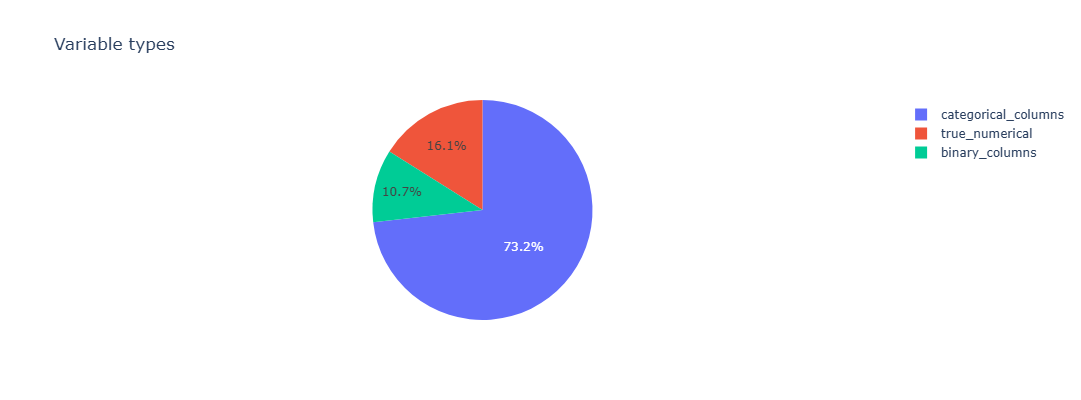

In [33]:
pie_perc = go.Pie(
    labels=list(var.keys()),
    values=list(var.values())
)
layout    = dict(title= "Variable types", height=400, width=800)
fig       = dict(data=[pie_perc], layout=layout)
py.iplot(fig)

__Inference__

most of the features are categorical variable

<h2>2 Checking the cardinality of a categorical variable</h2>

In [34]:
cardinality = []
for c in categorical_columns:
    if c == "MachineIdentifier":
        continue
    else:
        cardinality.append([c,train[c].nunique()])

In [35]:
cardinality

[['EngineVersion', 54],
 ['AppVersion', 89],
 ['AvSigVersion', 6161],
 ['AVProductStatesIdentifier', 4789],
 ['CountryIdentifier', 222],
 ['CityIdentifier', 33503],
 ['OrganizationIdentifier', 43],
 ['GeoNameIdentifier', 265],
 ['LocaleEnglishNameIdentifier', 226],
 ['OsBuild', 50],
 ['OsSuite', 9],
 ['OsPlatformSubRelease', 9],
 ['OsBuildLab', 451],
 ['SkuEdition', 8],
 ['IeVerIdentifier', 183],
 ['SmartScreen', 12],
 ['Census_MDC2FormFactor', 12],
 ['Census_OEMNameIdentifier', 1231],
 ['Census_OEMModelIdentifier', 36059],
 ['Census_ProcessorManufacturerIdentifier', 4],
 ['Census_ProcessorModelIdentifier', 1723],
 ['Census_PrimaryDiskTypeName', 4],
 ['Census_ChassisTypeName', 33],
 ['Census_PowerPlatformRoleName', 9],
 ['Census_InternalBatteryType', 28],
 ['Census_OSVersion', 296],
 ['Census_OSBranch', 15],
 ['Census_OSBuildNumber', 57],
 ['Census_OSBuildRevision', 233],
 ['Census_OSEdition', 21],
 ['Census_OSSkuName', 20],
 ['Census_OSInstallTypeName', 9],
 ['Census_OSInstallLanguage

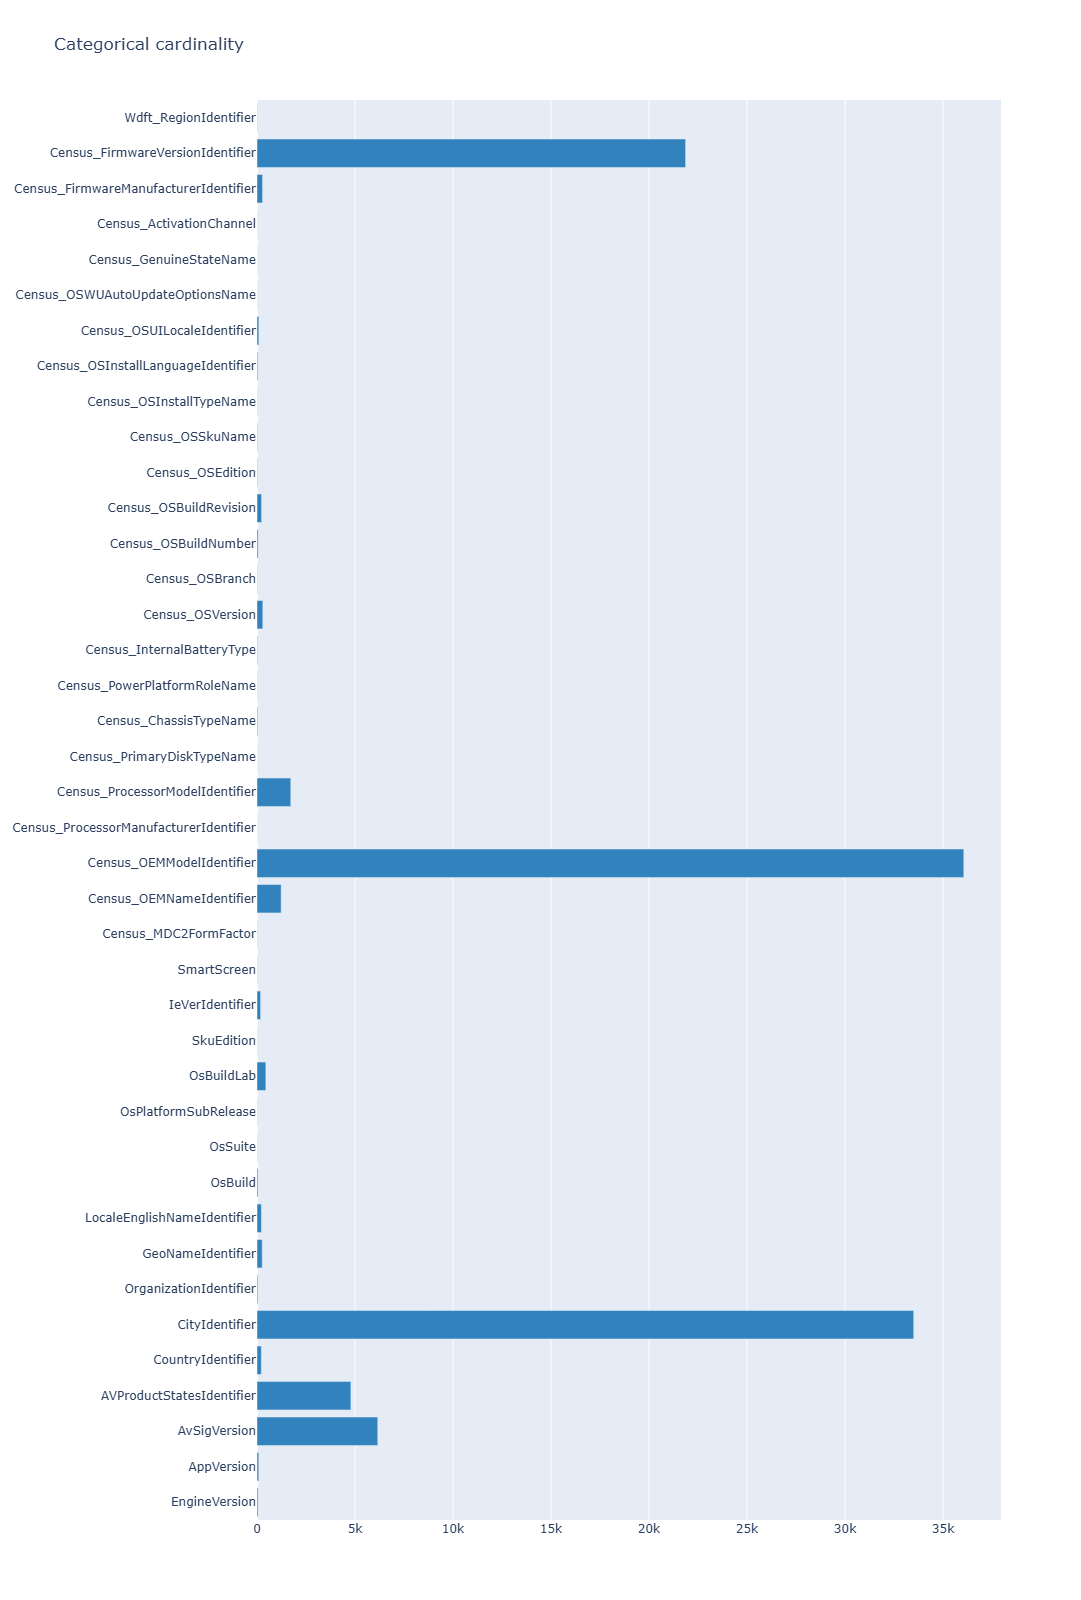

In [36]:
trace = go.Bar(y=[x[0] for x in cardinality],
               x=[x[1] for x in cardinality],
               orientation='h', marker=dict(color='rgb(49,130,189)'), name='train')
layout    = dict(title='Categorical cardinality', height=1600, width=800)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [37]:
len([c for c,n in cardinality if n>30])

23

__INFERENCE__

23 variables have high cardinality (more than 30 unique values). During feature engineering, we will treat them differently.


<h3> 3 Check distribution of target variable</h3>

In [38]:
malware_df['HasDetections'].value_counts()

HasDetections
1    200443
0    199557
Name: count, dtype: int64

<Axes: xlabel='HasDetections'>

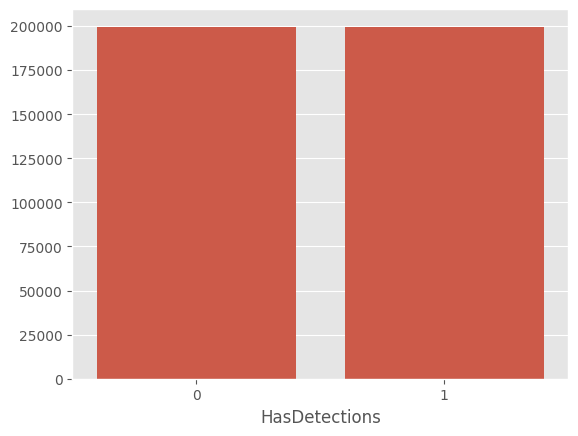

In [39]:
counts = malware_df['HasDetections'].value_counts()
sns.barplot(x=counts.index, y=counts[0])


__INFERENCE__

Target is balanced

<h3>4 Check the correlation</h3>

<Axes: >

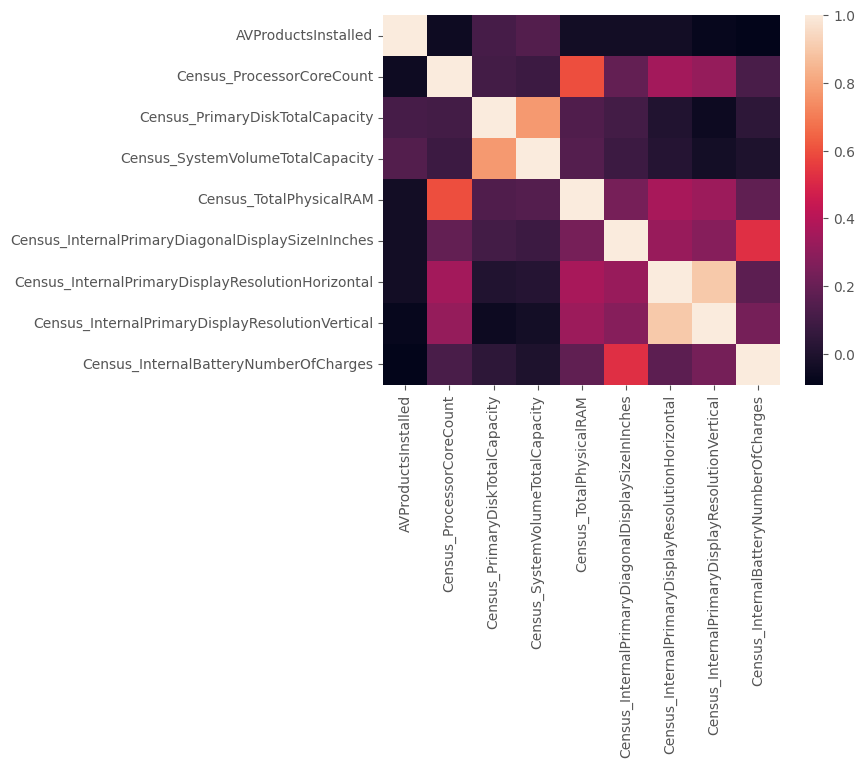

In [40]:
sns.heatmap(malware_df[true_numerical].corr())

<h2>Understanding each features detection rate</h2>

In [41]:
def detection_groupby_feature(col,top_n,by_touch=False):
    if not by_touch:
        top_n = top_n if malware_df[col].nunique()>top_n else malware_df[col].nunique()
        print(f"{col} has {malware_df[col].nunique()}")
        print(f"{col} we selecting {top_n} columns out of it")
        top_cat = list(malware_df[col].value_counts(dropna=False).index[:top_n])
        df_has_detection = malware_df.loc[((malware_df[col].isin(top_cat)) & (malware_df['HasDetections']==1)),col].value_counts().head(10).sort_index()
        df_hasno_detection = malware_df.loc[(malware_df[col].isin(top_cat)) & (malware_df['HasDetections']==0),col].value_counts().head(10).sort_index()
    
        data= [go.Bar(x=df_has_detection.index,y=df_has_detection.values,name='has_detection'),
               go.Bar(x=df_hasno_detection.index, y=df_hasno_detection.values, name='No Detections')]
    
        layout = dict(title=f"Counts of {col} by top-{top_n} categories",height=1600, width=800)
        fig = go.Figure(data=data, layout=layout)
        fig.show()
    
    else:
        top_n = top_n if malware_df[col].nunique()>top_n else malware_df[col].nunique()
        top_cat = list(malware_df[col].value_counts(dropna=False).index[:top_n])
        top_cat_df = malware_df[col].isin(top_cat)
       
        df_touch_enabled = malware_df.loc[(malware_df[col].isin(top_cat)) & (malware_df['Census_IsTouchEnabled'] == 1),[col,'HasDetections']]
        df_touch_disabled = malware_df.loc[( malware_df[col].isin(top_cat)) & (malware_df['Census_IsTouchEnabled']==0),[col,'HasDetections']]
        
        
        df_touch_enabled[col] = df_touch_enabled[col].fillna('unknown').astype(str)
        df_touch_disabled[col] = df_touch_disabled[col].fillna('unknown').astype(str)

        df_touch_enabled_counts =df_touch_enabled.groupby(col).agg({'HasDetections':['count','mean']})
        df_touch_disabled_counts =  df_touch_disabled.groupby(col).agg({'HasDetections':['count','mean']})
  
        categories = sorted(set(df_touch_enabled_counts.index) | set(df_touch_disabled_counts.index))
        df_touch_enabled_counts=df_touch_enabled_counts.reindex(categories,fill_value=0).reset_index()
        df_touch_disabled_counts=df_touch_disabled_counts.reindex(categories,fill_value=0).reset_index()
        df_touch_enabled_counts.columns = [col,'count', 'mean']
        df_touch_disabled_counts.columns = [col,'count', 'mean']
        
        
       
        x=np.arange(len(categories))
        width = 0.35
        fig, ax1 = plt.subplots(figsize=(8,6))
        
        
        ax1.bar(x-width/2,
               df_touch_enabled_counts['count'],
               width=0.4,
               label='Touch Enabled')
        ax2 = ax1.twinx()
        ax2.plot(categories,
               df_touch_enabled_counts['mean'],
               marker='o',
               label='Touch enaled')

        ax1.bar(x+width/2,
               df_touch_disabled_counts['count'],
               width=0.4,
               label='Touch disabled')
        ax2.plot(categories,
               df_touch_disabled_counts['mean'],
                marker='x',
               label='Touch Disabled',)

        ax1.set_xticks(x)
        ax1.set_xticklabels(categories, rotation=90)
        ax1.set_ylabel('count')
        ax2.set_xlabel("detection rate")
        ax1.legend()

        plt.show()
        

<h2>'AVProductsInstalled'</h2>

Census_IsTouchEnabled has 2
Census_IsTouchEnabled we selecting 2 columns out of it


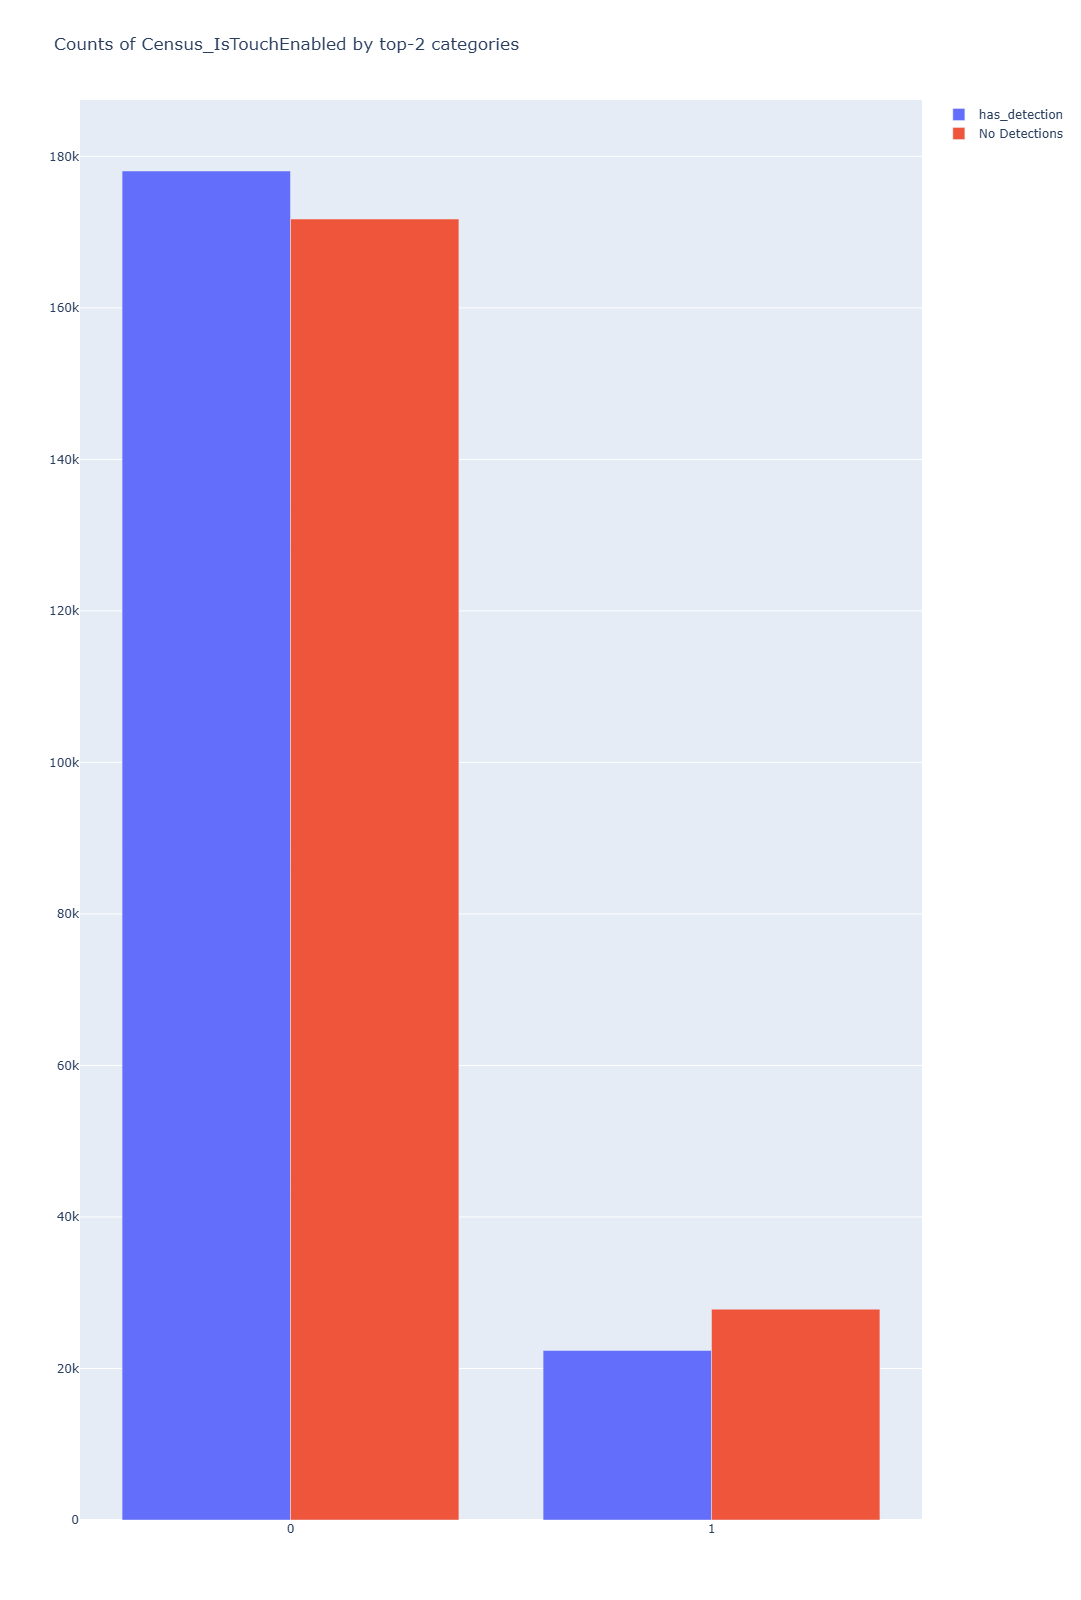

In [42]:
detection_groupby_feature("Census_IsTouchEnabled",top_n=10,by_touch=False)

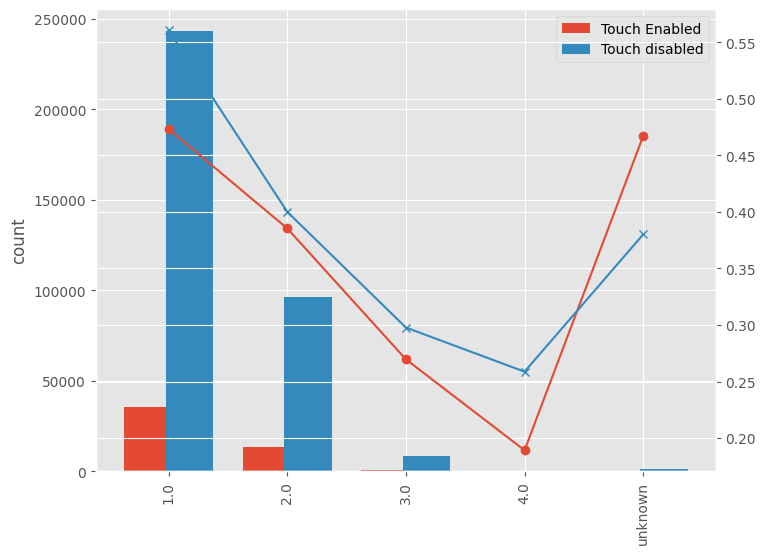

In [43]:
detection_groupby_feature('AVProductsInstalled',top_n=10,by_touch=True)

__INFERENCE__

detection rate for touch disable devices having installed 1 antivirus software is higher as compare to detection rate for touch enabled devices.increasing number of antivirus software installation will decrease the detection rate for both touch enabled and touch disabled one .4 Antivirus installed devices are lower detection, which means lower virus


<h2>OsPlatformSubRelease</h2>

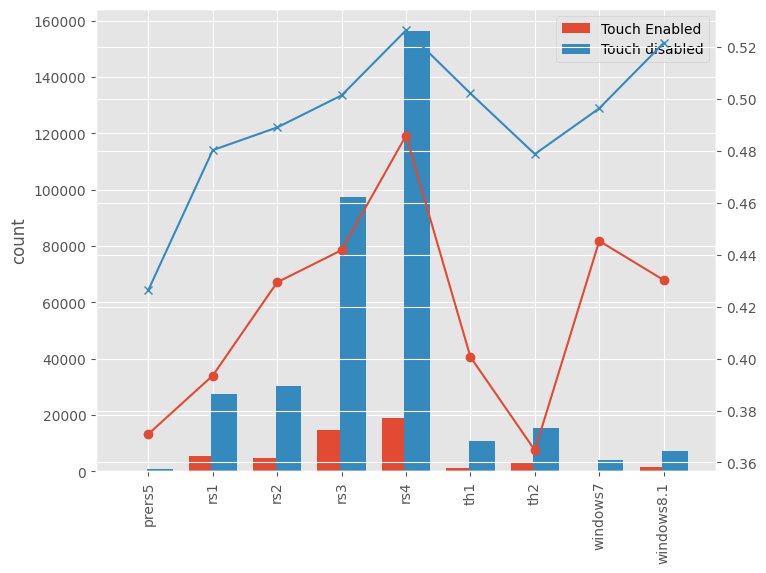

In [44]:
detection_groupby_feature('OsPlatformSubRelease',top_n=10,by_touch=True)

__INFERENCE__

Most of the devices used windows10(rs4)

Windows rs4 have higher detection rate(for both touch enabled and touch enabled)

th2 touch disabled have lower detection rate

windows 8.1 touch disabled having increased detection rate but touch disabled having declined detection rate

<h2>Census_ProcessorCoreCount</h2>

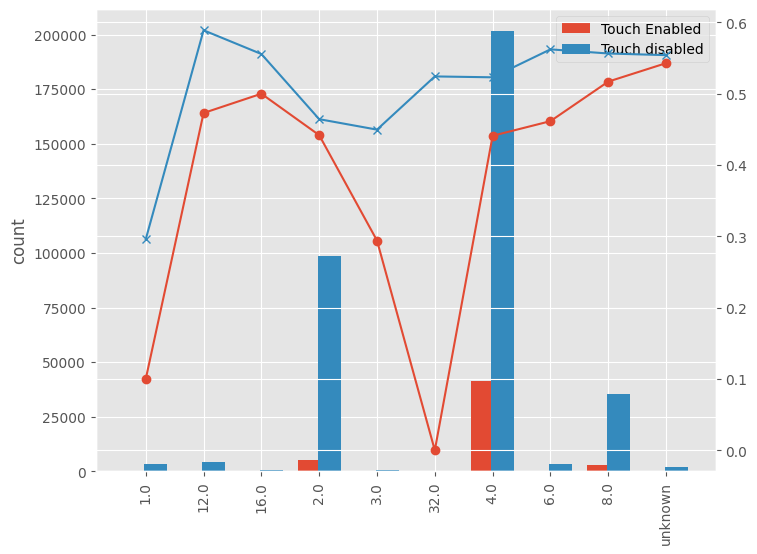

In [45]:
detection_groupby_feature('Census_ProcessorCoreCount',top_n=10,by_touch=True)

__INFERENCE__

Among Touch enabled Census_ProcessorCoreCount 32.0 shows the lower detection rate, which indicates lower number of viruses. but after that detection rate is improved significantly

Most of the devices contain Census_ProcessorCoreCount 4.0,comparing with other processor which have good detection rate


<h2>Census_TotalPhysicalRAM</h2>

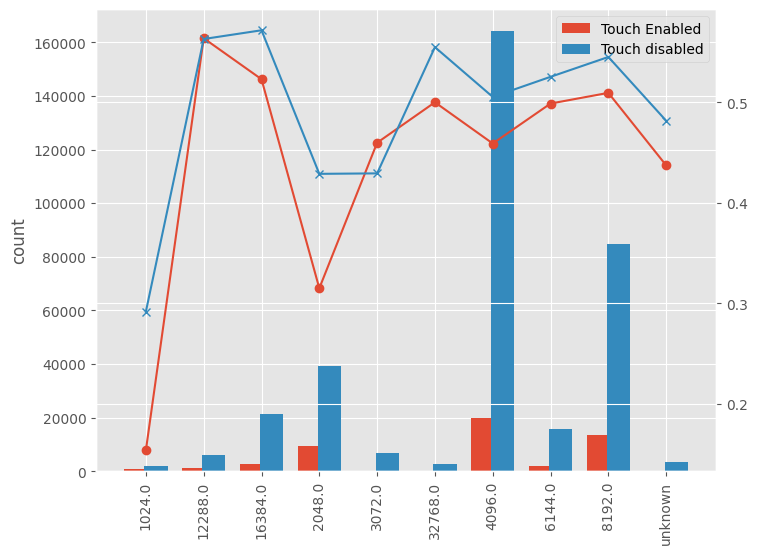

In [46]:
detection_groupby_feature('Census_TotalPhysicalRAM',top_n=10,by_touch=True)

Increasing pysical RAM size means improve the detection rate for both touch enabled and touch disabled devices

<h2>Census_InternalPrimaryDiagonalDisplaySizeInInches</h2>

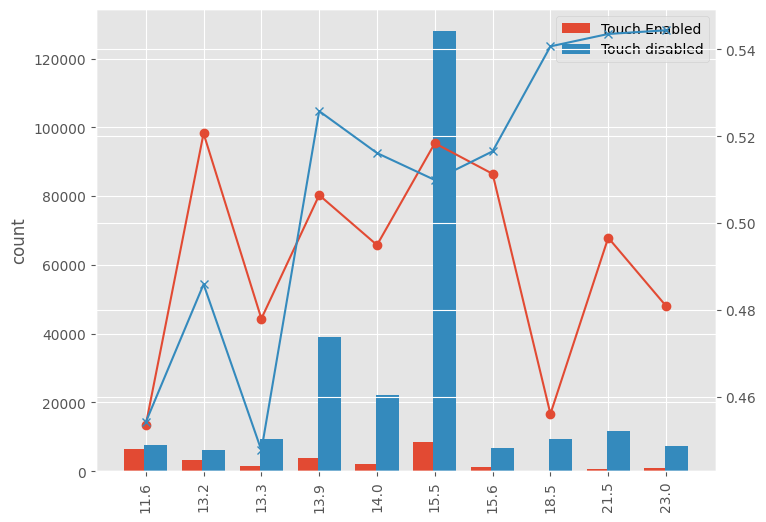

In [47]:
detection_groupby_feature('Census_InternalPrimaryDiagonalDisplaySizeInInches',top_n=10,by_touch=True)

__INFERENCE__

Most of the devices were 15.5inch display.

In touch disabled devices increasing the display screen size shows increasing detection rate



<h2>Census_PowerPlatformRoleName</h2>

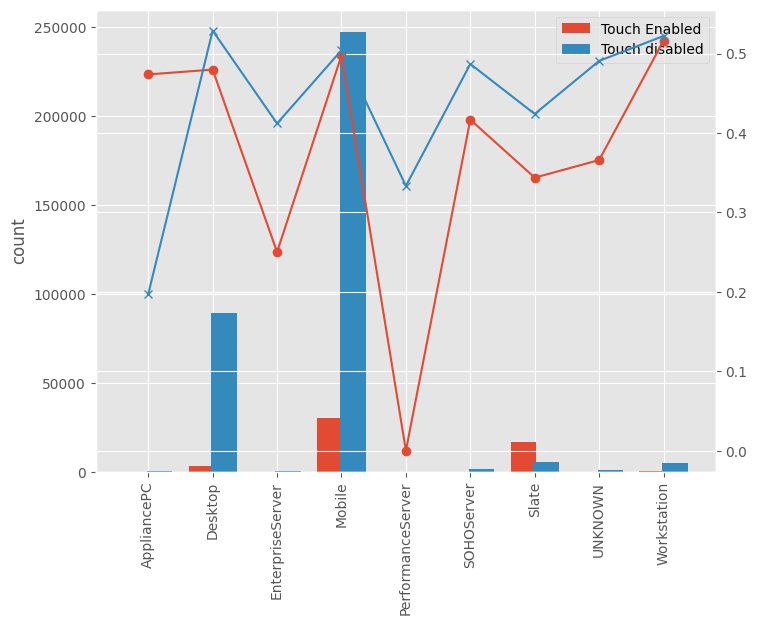

In [48]:
detection_groupby_feature('Census_PowerPlatformRoleName',top_n=10,by_touch=True)

__Inference__

Touch disabled desktop have the higher detection rate,but when it comes to touch enabled devices detection rate mobile have the higher detection rate

Malware detection varies by device role: desktops and mobiles show higher detection rates due to greater user interaction, while servers have lower rates because of controlled environments. Touch capability further influences detection patterns, making device role and touch status important features for malware prediction models.

<h2>Checking the numerical variable to the Target variable</h2>

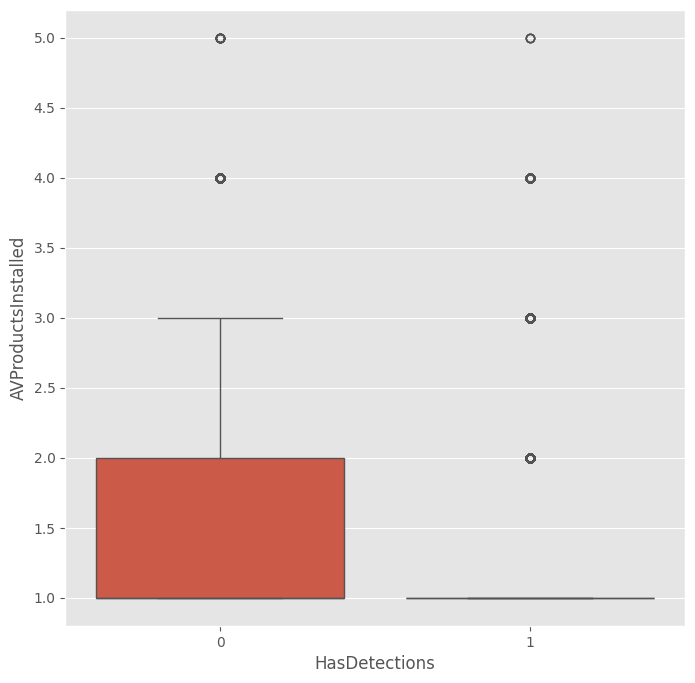

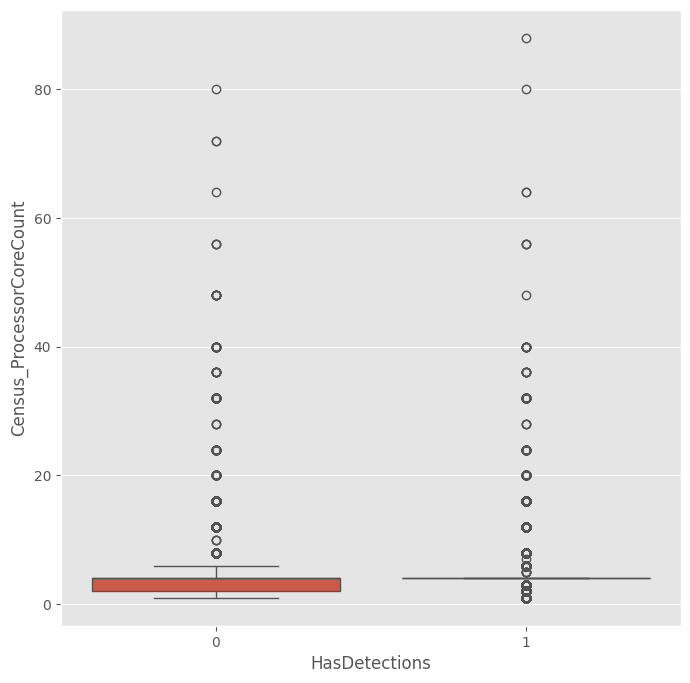

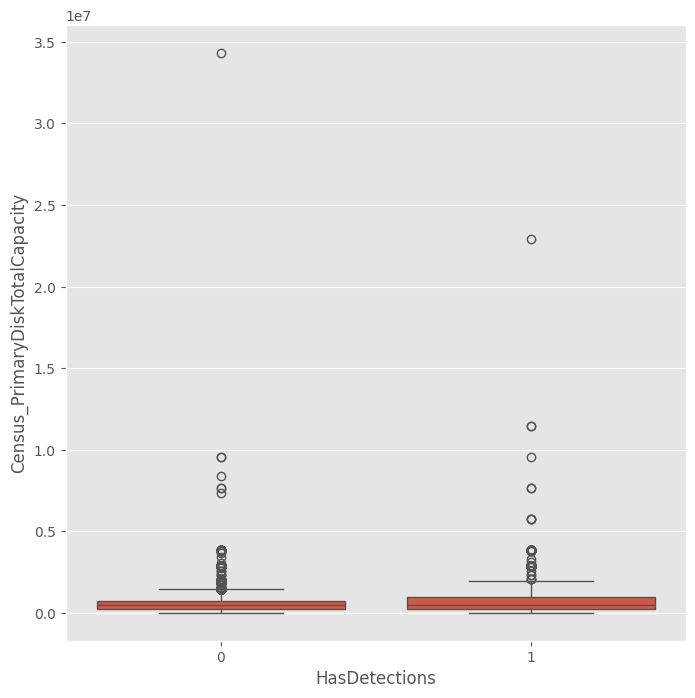

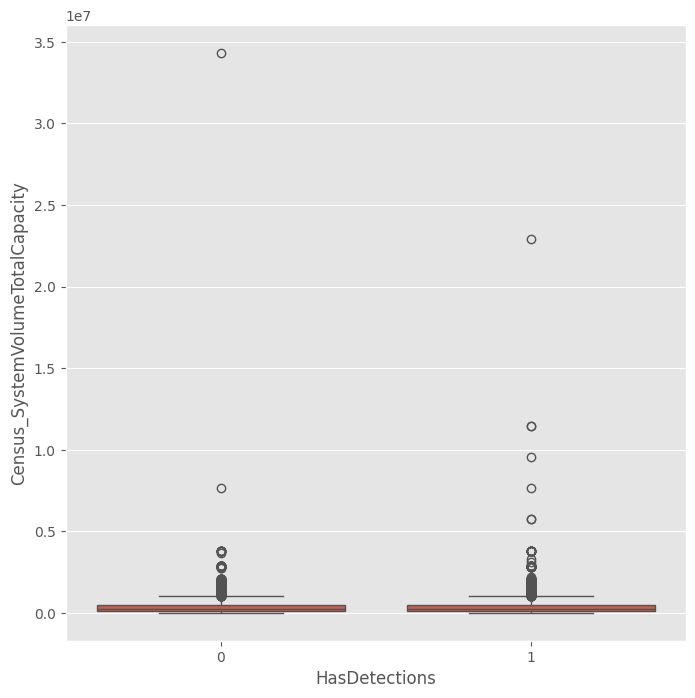

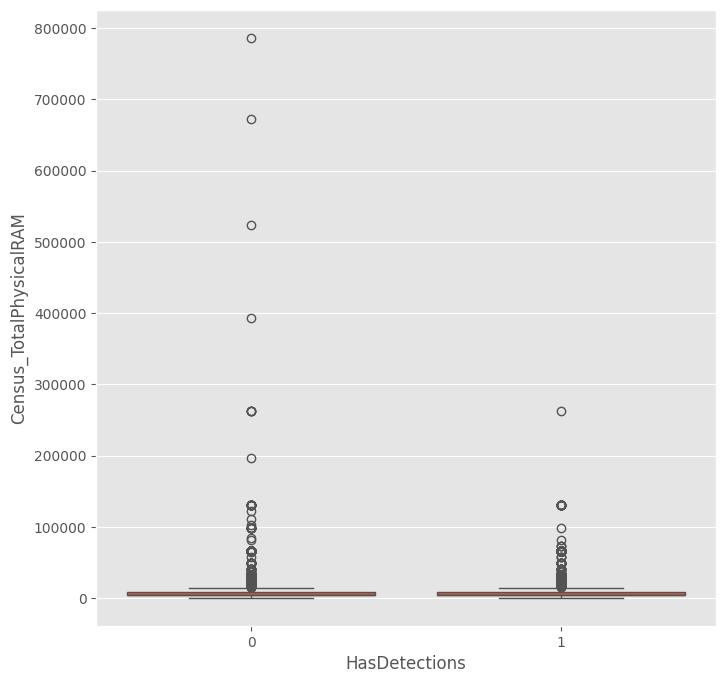

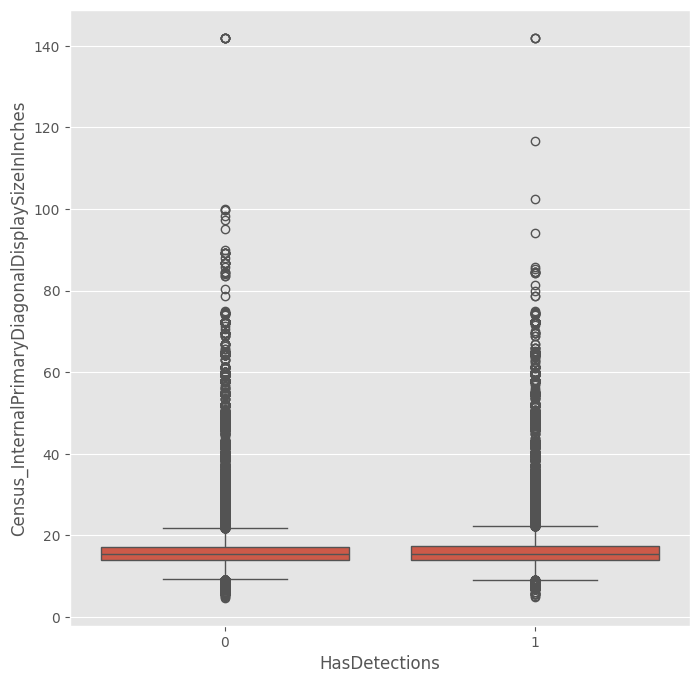

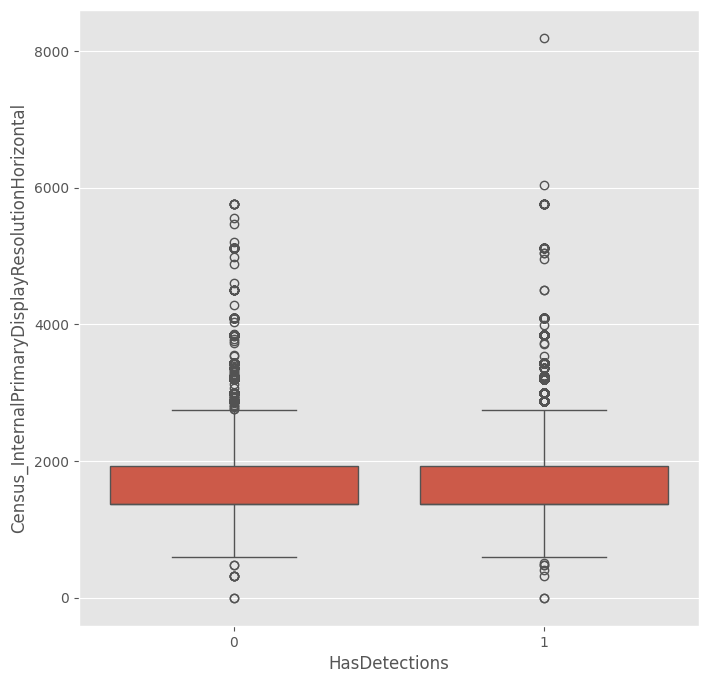

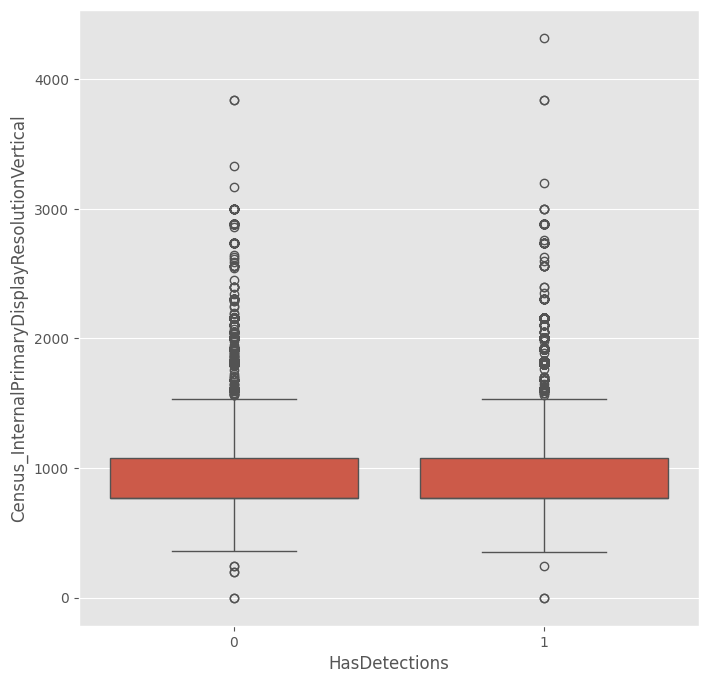

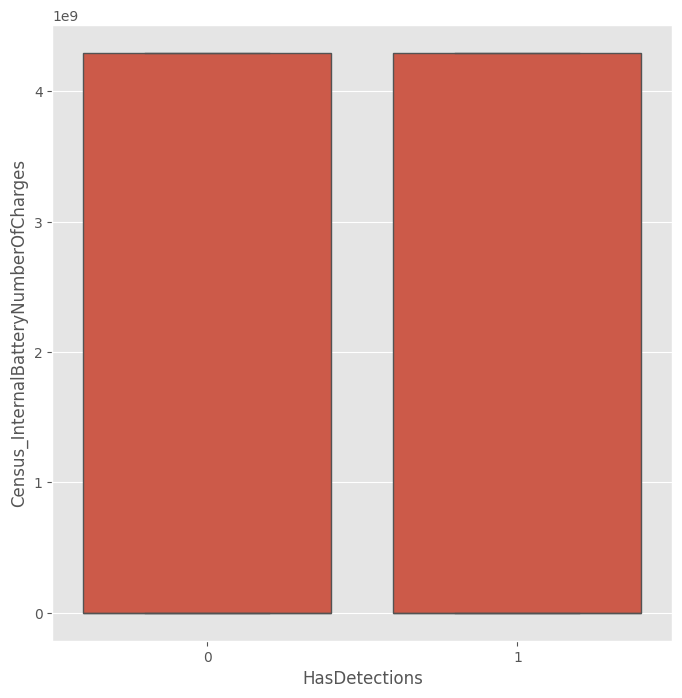

In [49]:
for i,num in enumerate(true_numerical):
    plt.figure(figsize=(8,8))
    
    sns.boxplot(x='HasDetections',y=num,data=malware_df)
plt.show()

__INFERENCE__

When HasDetections = 0 (No malware)

Most systems have 1–2 antivirus products

Median is around 1

Wider spread → more variation

Some systems have up to 3 AV products

🔹 When HasDetections = 1 (Malware detected)

Most systems have exactly 1 antivirus

Very little variation

Few outliers with 2 or 3 AV products

<h2>Perform statistical significance tests on categorical features</h2>

In [50]:
from scipy.stats import chi2_contingency

In [51]:
malware_df[categorical_columns+binary_columns]

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,5.0,2340.0,HDD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,628.0,36144.0,10.0,NaN,NaN,0,0,0.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,5.0,2404.0,HDD,Notebook,Mobile,NaN,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,628.0,57858.0,8.0,NaN,NaN,0,0,0.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,5.0,1972.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,52682.0,3.0,NaN,NaN,0,0,0.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,5.0,2272.0,UNKNOWN,MiniTower,Desktop,NaN,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,355.0,20050.0,3.0,NaN,NaN,0,0,0.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,5.0,2500.0,HDD,Portable,Mobile,lion,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,355.0,19844.0,1.0,0.0,0.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0b811c2969b76a1cc48d93c7cd8c1bc6,1.1.15100.1,4.18.1807.18075,1.273.703.0,53447.0,169,53686.0,NaN,209.0,179,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,Off,Desktop,2668.0,3254.0,5.0,3224.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,28.0,123,FullAuto,IS_GENUINE,OEM:NONSLP,628.0,18649.0,3.0,NaN,NaN,0,0,0.0,1
399996,0b811c89b96088cf276857da722c0f16,1.1.15100.1,4.18.1806.18062,1.273.499.0,53447.0,68,19586.0,27.0,276.0,74,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,RequireAdmin,Desktop,2102.0,230100.0,5.0,2684.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:DM,93.0,33054.0,12.0,NaN,NaN,1,0,0.0,1
399997,0b811f5d5a019d5a8e95c9d2e370bf7f,1.1.15100.1,4.18.1807.18075,1.273.1693.0,61343.0,53,NaN,27.0,71.

In [52]:
significant = []
for cat in categorical_columns[1:]+binary_columns:
    gr=pd.crosstab(malware_df[cat].astype('str'),malware_df['HasDetections'].astype('category'))
    chi,p,dof,expec=chi2_contingency(gr)
    print(f"{cat.ljust(40)},{chi:.5f} , {p:.5f}")
    if p < 0.05:
     significant.append([cat,p])

EngineVersion                           ,6311.07599 , 0.00000
AppVersion                              ,4716.02066 , 0.00000
AvSigVersion                            ,14394.92083 , 0.00000
AVProductStatesIdentifier               ,19931.10821 , 0.00000
CountryIdentifier                       ,3440.35375 , 0.00000
CityIdentifier                          ,37128.60993 , 0.00000
OrganizationIdentifier                  ,169.03393 , 0.00000
GeoNameIdentifier                       ,2512.78455 , 0.00000
LocaleEnglishNameIdentifier             ,2179.68686 , 0.00000
OsBuild                                 ,783.32368 , 0.00000
OsSuite                                 ,271.54312 , 0.00000
OsPlatformSubRelease                    ,715.06731 , 0.00000
OsBuildLab                              ,3813.46427 , 0.00000
SkuEdition                              ,241.04685 , 0.00000
IeVerIdentifier                         ,1414.26754 , 0.00000
SmartScreen                             ,20808.98914 , 0.00000
Census_MD

In [53]:
significant

[['EngineVersion', np.float64(0.0)],
 ['AppVersion', np.float64(0.0)],
 ['AvSigVersion', np.float64(0.0)],
 ['AVProductStatesIdentifier', np.float64(0.0)],
 ['CountryIdentifier', np.float64(0.0)],
 ['CityIdentifier', np.float64(4.972005874262756e-42)],
 ['OrganizationIdentifier', np.float64(7.430419769381634e-17)],
 ['GeoNameIdentifier', np.float64(0.0)],
 ['LocaleEnglishNameIdentifier', np.float64(0.0)],
 ['OsBuild', np.float64(5.798257583011975e-133)],
 ['OsSuite', np.float64(4.6245229136698464e-54)],
 ['OsPlatformSubRelease', np.float64(4.0790201165057195e-149)],
 ['OsBuildLab', np.float64(0.0)],
 ['SkuEdition', np.float64(2.225719882515149e-48)],
 ['IeVerIdentifier', np.float64(4.831808278714738e-189)],
 ['SmartScreen', np.float64(0.0)],
 ['Census_MDC2FormFactor', np.float64(0.0)],
 ['Census_OEMNameIdentifier', np.float64(0.0)],
 ['Census_OEMModelIdentifier', np.float64(1.5270047021665042e-188)],
 ['Census_ProcessorManufacturerIdentifier', np.float64(4.557256444175254e-11)],
 ['Cen

In [54]:
len(significant)

45

<h2>ODDS RATIO</h2>

In [55]:
def odd_ratio(cat):
 ctab = pd.crosstab(malware_df[cat].astype('str'),malware_df['HasDetections'].astype('category'))
 ctab.columns = ctab.columns.add_categories('odds')
 ctab['odds']=ctab[1]/ctab[0]
 ctab.columns = ctab.columns.add_categories("odds_ratio")
 ctab["odds_ratio"]=ctab['odds']/(np.sum(ctab[1])/np.sum(ctab[0]))
 return ctab

In [56]:
odd_ratio("OsPlatformSubRelease")

HasDetections,0,1,odds,odds_ratio
OsPlatformSubRelease,,,,
prers5,534,385,0.720974,0.717787
rs1,17515,15268,0.871710,0.867857
rs2,18332,16974,0.925922,0.921829
rs3,56752,55299,0.974397,0.970090
rs4,83787,91507,1.092138,1.087311
th1,6143,5942,0.967280,0.963004
th2,10046,8539,0.849990,0.846233
windows7,2158,2114,0.979611,0.975281
windows8.1,4290,4415,1.029138,1.024589


__INFERENCE__

rs4 has the highest malware detection odds, so it’s the riskiest platform in this dataset.

prers5 and th2 are relatively safer (lowest odds).

Odds ratios >1 → increased risk, <1 → decreased risk compared to baseline.

__ODDS RATIO FOR CountryIdentifier__

In [57]:
odds_df=odd_ratio("CountryIdentifier")

In [58]:
odds_df

HasDetections,0,1,odds,odds_ratio
CountryIdentifier,,,,
1,63,44,0.698413,0.695326
10,7,12,1.714286,1.706708
100,590,748,1.267797,1.262193
101,1945,1725,0.886889,0.882969
102,585,502,0.858120,0.854327
103,75,87,1.160000,1.154873
104,453,892,1.969095,1.960391
105,11,17,1.545455,1.538623
106,26,16,0.615385,0.612664


In [59]:
odds_df[odds_df['odds_ratio']>1].shape

(77, 4)

In [60]:
odds_df.nlargest(10,columns='odds_ratio')

HasDetections,0,1,odds,odds_ratio
CountryIdentifier,,,,
190,134,265,1.977612,1.968870
104,453,892,1.969095,1.960391
131,314,549,1.748408,1.740679
61,194,333,1.716495,1.708908
10,7,12,1.714286,1.706708
95,918,1549,1.687364,1.679905
214,3247,5231,1.611026,1.603904
163,168,270,1.607143,1.600039
105,11,17,1.545455,1.538623


__INFERENCE__

The results highlight the top 10 countries with the greatest malware detection risk. All selected countries have odds ratios > 1, meaning they are more prone to malware detections than the baseline. Countries 190 and 104 rank highest, showing nearly twice the odds of detection. This confirms that the model captures strong country-level risk patterns, and CountryIdentifier is a high-impact feature. Lower-ranked countries in the top 10 still show consistently elevated risk, reinforcing the geographical influence on malware prevalence.

also there are 77 countries which have odds ratio greate than 1(highly affected)

__odd_ratio FOR 'SkuEdition'__

In [61]:
odd_ratio('SkuEdition')

HasDetections,0,1,odds,odds_ratio
SkuEdition,,,,
Cloud,156,89,0.570513,0.567991
Education,852,911,1.069249,1.064523
Enterprise,780,807,1.034615,1.030042
Enterprise LTSB,433,520,1.200924,1.195615
Home,125360,121975,0.972998,0.968697
Invalid,1864,1730,0.928112,0.924009
Pro,70006,74372,1.062366,1.057670
Server,106,39,0.367925,0.366298


__INFERENCE__

The odds ratio analysis for SkuEdition shows clear variation in malware detection risk across Windows editions. Enterprise LTSB has the highest odds ratio (~1.20), indicating a noticeably higher likelihood of malware detection compared to the reference group. Education, Enterprise, and Pro editions also have odds ratios slightly above 1, suggesting a marginally higher risk. In contrast, Cloud, Home, Invalid, and Server editions have odds ratios below 1, indicating a lower probability of malware detection. Overall, SkuEdition is a meaningful categorical feature, with enterprise-oriented editions showing relatively higher detection rates.


__ODD RATIO FOR Census_MDC2FormFactor__

In [62]:
odd_ratio('Census_MDC2FormFactor')

HasDetections,0,1,odds,odds_ratio
Census_MDC2FormFactor,,,,
AllInOne,6347,6852,1.079565,1.074793
Convertible,9071,9170,1.010914,1.006445
Desktop,41462,45842,1.105639,1.100752
Detachable,8439,4966,0.588458,0.585857
LargeServer,30,13,0.433333,0.431418
LargeTablet,2039,914,0.448259,0.446278
MediumServer,103,47,0.456311,0.454294
Notebook,127439,129256,1.014258,1.009775
PCOther,3259,2994,0.918687,0.914626


__Inference:__

Desktop and All-in-One devices show higher malware detection risk, while Notebooks and Convertibles are near average. Tablets and Server form factors have much lower odds, indicating reduced malware exposure.

__ODD RATIO FOR  Census_ProcessorManufacturerIdentifier__

In [63]:
odd_ratio('Census_ProcessorManufacturerIdentifier')

HasDetections,0,1,odds,odds_ratio
Census_ProcessorManufacturerIdentifier,,,,
1.0,23635,23174,0.980495,0.976161
10.0,20,0,0.000000,0.000000
3.0,9,1,0.111111,0.110620
5.0,175058,176233,1.006712,1.002262
nan,835,1035,1.239521,1.234042


__Inference:__


Most processor manufacturers show near-neutral risk (odds ratio ≈ 1). The unknown (NaN) category has a higher malware detection likelihood, while rare manufacturers show very low odds, likely due to small sample sizes.

__ODD RATIO FOR  Census_PrimaryDiskTypeName__

In [64]:
odd_ratio('Census_PrimaryDiskTypeName')

HasDetections,0,1,odds,odds_ratio
Census_PrimaryDiskTypeName,,,,
HDD,127713,132349,1.036300,1.031719
SSD,55918,54992,0.983440,0.979093
UNKNOWN,8749,7177,0.820322,0.816696
Unspecified,6852,5642,0.823409,0.819770
nan,325,283,0.870769,0.866920


__Inference:__

HDD systems have slightly higher malware detection odds, while SSD systems show marginally lower risk. UNKNOWN, Unspecified, and NaN disk types have lower odds, possibly reflecting incomplete or inconsistent device information.

__ODD RATIO FOR  Census_ChassisTypeName__

In [65]:
odd_ratio('Census_ChassisTypeName')

HasDetections,0,1,odds,odds_ratio
Census_ChassisTypeName,,,,
0,2,4,2.000000,1.991160
30,8,3,0.375000,0.373342
32,0,1,inf,inf
35,3,0,0.000000,0.000000
36,1,0,0.000000,0.000000
82,0,1,inf,inf
AllinOne,4441,4856,1.093447,1.088614
Blade,2,2,1.000000,0.995580
BusExpansionChassis,22,12,0.545455,0.543044


__Inference:__

Desktop, MiniTower, and All-in-One chassis show higher malware detection odds, while laptops/notebooks are near neutral. Detachable, handheld, tablet, and mini PCs have lower odds, indicating reduced risk. Categories with very small counts (0/inf odds) are unreliable.

__ODD RATIO FOR  Census_PowerPlatformRoleName__

In [66]:
odd_ratio('Census_PowerPlatformRoleName')

HasDetections,0,1,odds,odds_ratio
Census_PowerPlatformRoleName,,,,
AppliancePC,120,36,0.300000,0.298674
Desktop,43792,48790,1.114130,1.109206
EnterpriseServer,200,139,0.695000,0.691928
Mobile,137798,139682,1.013672,1.009192
PerformanceServer,2,1,0.500000,0.497790
SOHOServer,883,836,0.946772,0.942587
Slate,13965,7974,0.570999,0.568475
UNKNOWN,464,437,0.941810,0.937647
Workstation,2333,2546,1.091299,1.086475


__Inference:__

Desktop and Workstation roles have higher malware detection odds, while Mobile is near neutral. Slate and AppliancePC show lower risk, and server roles generally have reduced odds. NaN/very small counts are unreliable.

__ODD RATIO FOR  Census_OSEdition__

In [67]:
odd_ratio('Census_OSEdition')

HasDetections,0,1,odds,odds_ratio
Census_OSEdition,,,,
Cloud,169,104,0.615385,0.612664
Core,82467,73315,0.889022,0.885093
CoreCountrySpecific,3746,3759,1.003470,0.999035
CoreN,117,112,0.957265,0.953034
CoreSingleLanguage,40595,46520,1.145954,1.140889
Education,839,929,1.107271,1.102376
EducationN,26,22,0.846154,0.842414
Enterprise,807,823,1.019827,1.015319
EnterpriseN,7,11,1.571429,1.564483


__Inference:__

CoreSingleLanguage, Professional, and Education variants show higher malware detection odds, while Core and Cloud editions have lower risk. Enterprise variants are mostly near neutral, and server editions generally show reduced odds. Categories with very small counts are unreliable.

__ODDS RATIO FOR Census_IsSecureBootEnabled__

In [68]:
odd_ratio('Census_IsSecureBootEnabled')

HasDetections,0,1,odds,odds_ratio
Census_IsSecureBootEnabled,,,,
0,102380,103088,1.006915,1.002465
1,97177,97355,1.001832,0.997403


__Inference:__

Secure Boot enabled or disabled shows almost no difference in malware detection risk, as odds ratios are ~1, indicating a neutral effect.

<h2>ANNOVA TEST</h2>

In [69]:
# from scipy.stats import f_oneway
# alpha=0.05
# significant_num = []
# unique_values=malware_df['HasDetections'].unique()
# for column in true_numerical:
#     gr = [malware_df[malware_df['HasDetections']==values][column].dropna() for values in unique_values]
#     f_stats,p = f_oneway(*gr)
#     print(f"Test on {column.ljust(40)},pvalue is {p:.5f}")
#     if p < 0.05:
#        significant_num.append(column)

__USING f_classify__

In [70]:
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
significant_anova = []
X = malware_df[true_numerical]
y = malware_df['HasDetections']
X = SimpleImputer(strategy='mean').fit_transform(X)
F, p = f_classif(X, y)
p_value=dict(zip(true_numerical,p))
f_value=dict(zip(true_numerical,F))
for col in p_value.keys():
    print(f"{col.ljust(20)} p value is {p_value[col]:.5f}")
    if p_value[col] < 0.05:
       significant_anova.append(col)

AVProductsInstalled  p value is 0.00000
Census_ProcessorCoreCount p value is 0.00000
Census_PrimaryDiskTotalCapacity p value is 0.00000
Census_SystemVolumeTotalCapacity p value is 0.00000
Census_TotalPhysicalRAM p value is 0.00000
Census_InternalPrimaryDiagonalDisplaySizeInInches p value is 0.00000
Census_InternalPrimaryDisplayResolutionHorizontal p value is 0.00000
Census_InternalPrimaryDisplayResolutionVertical p value is 0.00000
Census_InternalBatteryNumberOfCharges p value is 0.00000


__Using statsmodels.api__

In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [72]:
for col in true_numerical:
    model = ols(f'{col}~C(HasDetections)',malware_df).fit()
    print(f"column_name = {col.ljust(50)},resid = {model.df_resid:.0f},f_value = {model.fvalue:0.5f},p_value={model.f_pvalue:0.5f}")
    res=sm.stats.anova_lm(model,typ=2)
    res
    

column_name = AVProductsInstalled                               ,resid = 398374,f_value = 9042.67485,p_value=0.00000
column_name = Census_ProcessorCoreCount                         ,resid = 398128,f_value = 1082.85792,p_value=0.00000
column_name = Census_PrimaryDiskTotalCapacity                   ,resid = 397633,f_value = 1156.36240,p_value=0.00000
column_name = Census_SystemVolumeTotalCapacity                  ,resid = 397633,f_value = 124.34727,p_value=0.00000
column_name = Census_TotalPhysicalRAM                           ,resid = 396373,f_value = 1127.66491,p_value=0.00000
column_name = Census_InternalPrimaryDiagonalDisplaySizeInInches ,resid = 397802,f_value = 463.68816,p_value=0.00000
column_name = Census_InternalPrimaryDisplayResolutionHorizontal ,resid = 397806,f_value = 372.26635,p_value=0.00000
column_name = Census_InternalPrimaryDisplayResolutionVertical   ,resid = 397806,f_value = 60.25475,p_value=0.00000
column_name = Census_InternalBatteryNumberOfCharges             ,resi

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">FEATURE ENGINEERING</div>

Feature Engineering is the process of creating, transforming, and selecting input variables (features) from raw data to improve the performance of machine learning models.

What Feature Engineering Does

It converts raw data into meaningful features that better represent the underlying problem, helping models learn patterns more effectively.

Key Objectives

Improve model accuracy and generalization

Reduce noise and redundancy

Make relationships in data more visible to the model

Adapt data to the assumptions of algorithms

Two main type of feature

<ol>
    <li>
        Domain specific feature
    </li>
    <li>
        Encoding categorical feature
    </li>
</ol>

<h2>Domain-specific features</h2> these are features created using expert knowledge of the problem domain. They capture real-world meaning that raw data or generic transformations cannot.

In [73]:
malware_df["EngineVersion_2"] = malware_df["EngineVersion"].apply(lambda x:x.split(".")[2]).astype("category")
malware_df["EngineVersion_3"] = malware_df["EngineVersion"].apply(lambda x:x.split(".")[3]).astype("category")


In [74]:
# appvesion
malware_df["AppVersion_1"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[1]).astype("category")
malware_df["AppVersion_2"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[2]).astype("category")
malware_df["AppVersion_3"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[3]).astype("category")

In [75]:
# 'AvSigVersion'
malware_df['AvSigVersion_0'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[0]).astype("category")
malware_df['AvSigVersion_1'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[1]).astype("category")
malware_df['AvSigVersion_2'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[2]).astype("category")

In [76]:
# Operating System Lab

# Replace NA values of 'OsBuildLab' column with '0.0.0.0-0'
malware_df['OsBuildLab']   = malware_df['OsBuildLab'].fillna('0.0.0.0.0-0')

malware_df['OsBuildLab_0'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
malware_df['OsBuildLab_1'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
malware_df['OsBuildLab_2'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
malware_df['OsBuildLab_3'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1,15100,1,18,1807,18075,1,273,1527,17134,1,amd64fre,rs4_release
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,6144.0,Portable,14.000000,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,0.0,0.0,355.0,19844.0,0,0,0.0,1.0,1,15

In [77]:
# Operating System Version
malware_df['Census_OSVersion_0'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[0]).astype('category')
malware_df['Census_OSVersion_1'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[1]).astype('category')
malware_df['Census_OSVersion_2'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[2]).astype('category')
malware_df['Census_OSVersion_3'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[3]).astype('category')


In [78]:
# Storage 
malware_df['primary_drive_c_ratio'] = malware_df['Census_SystemVolumeTotalCapacity'] / malware_df['Census_PrimaryDiskTotalCapacity']
malware_df['non_primary_drive_MB']  = malware_df['Census_PrimaryDiskTotalCapacity'] /  malware_df['Census_SystemVolumeTotalCapacity']
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1,15100,1,18,1807,18075,1,273,1527,17134,1,amd64fre,rs4_release,10,0,17134,228,0.952368,1.050014
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Not

In [79]:
# Aspect Ratio 
malware_df['aspect_ratio'] = malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']/ malware_df['Census_InternalPrimaryDisplayResolutionVertical']


In [80]:
# Monitor Dimensions
cols = [
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical'
]

# Clean infinities
malware_df[cols] = malware_df[cols].replace([np.inf, -np.inf], np.nan)

# Create monitor dimensions safely
malware_df['monitor_dims'] = (
    malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']
        .astype('Int64')
        .astype(str)
    + '*'
    + malware_df['Census_InternalPrimaryDisplayResolutionVertical']
        .astype('Int64')
        .astype(str)
)

malware_df['monitor_dims'] = malware_df['monitor_dims'].astype('category')

In [81]:
# # DPI
# malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] =malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].replace(0, np.nan)
# malware_df['Census_InternalPrimaryDisplayResolutionHorizontal'] = malware_df['Census_InternalPrimaryDisplayResolutionHorizontal'].replace(0,np.nan)
# malware_df['Census_InternalPrimaryDisplayResolutionVertical']   = malware_df['Census_InternalPrimaryDisplayResolutionVertical'].replace(0,np.nan)
# malware_df['dpi'] = ((malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']**2)+(malware_df['Census_InternalPrimaryDisplayResolutionVertical']**2))**0.5/malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']

In [82]:
malware_df[cols] = malware_df[cols].astype('float64')

malware_df['dpi'] = (
    np.sqrt(
        malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']**2 +
        malware_df['Census_InternalPrimaryDisplayResolutionVertical']**2
    )
    /
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
)

malware_df['dpi'] = malware_df['dpi'].replace([np.inf, -np.inf], np.nan)
malware_df['dpi_square'] = malware_df['dpi'] ** 2

In [83]:
malware_df['Megapixel'] = (malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']*malware_df['Census_InternalPrimaryDisplayResolutionVertical'])/100000

In [84]:
malware_df['Megapixel']

0         12.96000
1         10.49088
2         20.73600
3         10.49088
4         10.49088
            ...   
399995    10.49088
399996    20.73600
399997    20.73600
399998    10.49088
399999    10.49088
Name: Megapixel, Length: 400000, dtype: float64

In [85]:
malware_df['ScreenArea'] = malware_df['Screen_Area'] = (
    malware_df['aspect_ratio'] *
    (malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']**2)
) / (malware_df['aspect_ratio']**2 + 1)


In [86]:
malware_df['ram_per_processor'] = malware_df['Census_TotalPhysicalRAM']/ malware_df['Census_ProcessorCoreCount']
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,monitor_dims,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715,1.599609,1440*900,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299,1.778320,1366*768,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969,1.777344,1920*1080,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,

In [87]:
cols = [
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_ProcessorCoreCount'
]

malware_df[cols] = malware_df[cols].replace([0, np.inf, -np.inf], np.nan)

malware_df['new_num_0'] = (
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] /
    malware_df['Census_ProcessorCoreCount']
)

malware_df['new_num_1'] = (
    malware_df['Census_ProcessorCoreCount'] *
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
)

# Optional cleanup
malware_df[['new_num_0', 'new_num_1']] = malware_df[['new_num_0', 'new_num_1']].replace(
    [np.inf, -np.inf], np.nan
)


In [88]:
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,monitor_dims,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715,1.599609,1440*900,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.62500
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299,1.778320,1366*768,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.59375
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969,1.777344,1920*1080,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.00000
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Profession

<h2>FREQUENCY ENCODING</h2>

In [89]:
categorical_feature_list = categorical_columns + ['EngineVersion_2', 'EngineVersion_3',
       'AppVersion_1', 'AppVersion_2', 'AppVersion_3', 'AvSigVersion_0',
       'AvSigVersion_1', 'AvSigVersion_2', 'OsBuildLab_0', 'OsBuildLab_1',
       'OsBuildLab_2', 'OsBuildLab_3', 'Census_OSVersion_0',
       'Census_OSVersion_1', 'Census_OSVersion_2', 'Census_OSVersion_3',
       'monitor_dims']

In [90]:
categorical_feature_list

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FirmwareManufacturerIdentifier',
 'Ce

In [91]:
categorical_feature_list.remove('MachineIdentifier')

In [92]:
import numpy as np
from tqdm.notebook import tqdm
feature_encoding_list = []
cat_indexed_toStr = []
for cat in tqdm(categorical_feature_list):
    if malware_df[cat].nunique() > 30:
        if malware_df[cat].dtype==np.float16:
            print(f"{cat.ljust(40)} have float_value")
            cat_indexed_toStr.append([cat,malware_df[cat].dtype])
            malware_df[cat] = malware_df[cat].astype("str")
        # frequency=malware_df.groupby(cat).agg({'MachineIdentifier':'count'}).squeeze()/len(malware_df)
        frequency = malware_df[cat].value_counts(normalize=True)
        print(f"{cat.ljust(30)},{frequency.shape}")
        malware_df[f"{cat}_fq"] = malware_df[cat].map(frequency)
        feature_encoding_list.append(cat)
malware_df.drop(columns=feature_encoding_list,inplace=True)
   

  0%|          | 0/57 [00:00<?, ?it/s]

EngineVersion                 ,(54,)
AppVersion                    ,(89,)
AvSigVersion                  ,(6161,)
AVProductStatesIdentifier     ,(4789,)
CountryIdentifier             ,(222,)
CityIdentifier                ,(33503,)
OrganizationIdentifier                   have float_value
OrganizationIdentifier        ,(44,)
GeoNameIdentifier                        have float_value
GeoNameIdentifier             ,(266,)
LocaleEnglishNameIdentifier   ,(226,)
OsBuild                       ,(50,)
OsBuildLab                    ,(452,)
IeVerIdentifier                          have float_value
IeVerIdentifier               ,(184,)
Census_OEMNameIdentifier                 have float_value
Census_OEMNameIdentifier      ,(1232,)
Census_OEMModelIdentifier     ,(36060,)
Census_ProcessorModelIdentifier          have float_value
Census_ProcessorModelIdentifier,(1724,)
Census_ChassisTypeName        ,(33,)
Census_OSVersion              ,(296,)
Census_OSBuildNumber          ,(57,)
Census_OSBuildRevision 

In [93]:
malware_df.head(5)

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,AVProductsInstalled,OsSuite,OsPlatformSubRelease,SkuEdition,SmartScreen,Census_MDC2FormFactor,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_3,AppVersion_1,AppVersion_2,AvSigVersion_0,OsBuildLab_2,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,EngineVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq
0,0000028988387b115f69f31a3bf04f09,1.0,256,rs4,Pro,NaN,Desktop,4.0,5.0,476940.0,HDD,299451.0,4096.0,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,0,0,0.0,10.0,0,1,18,1807,1,amd64fre,10,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.62500,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.196752,0.038565,0.038363,0.438233,0.409187,0.43484,0.144558,0.000003,0.001628,0.209238,0.101185,0.448647,0.101187,0.037318,0.037648,0.137997,0.000064,0.411747,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435
1,000007535c3f730efa9ea0b7ef1bd645,1.0,256,rs4,Pro,NaN,Notebook,4.0,5.0,476940.0,HDD,102385.0,4096.0,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NaN,NaN,0,0,0.0,8.0,0,4,13,17134,1,amd64fre,10,0,0.214671,4.658299,1.778320,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.59375,0.017690,0.028903,0.010852,0.656548,0.031758,0.000970,0.196752,0.020213,0.018687,0.438233,0.409187,0.43484,0.144558,0.000003,0.000795,0.588577,0.011370,0.448647,0.012018,0.356617,0.355540,0.137997,0.000064,0.017690,0.028903,0.017710,0.011707,0.438225,0.438872,0.438227,0.448647,0.012020,0.506143
2,000007905a28d863f6d0d597892cd692,1.0,768,rs4,Home,RequireAdmin,Desktop,4.0,5.0,114473.0,SSD,113907.0,4096.0,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,0,0,0.0,3.0,0,1,18,1807,1,amd64fre,10,0,0.995056,1.004969,1.777344,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.00000,0.411747,0.577400,0.001170,0.656548,0.004680,0.000195,0.196752,0.004230,0.003112,0.438233,0.409187,0.43484,0.015367,0.015605,0.001053,0.209238,0.101185,0.448647,0.101187,0.057465,0.057537,0.302915,0.000804,0.411747,0.577400,0.417372,0.001752,0.438225,0.438872,0.438227,0.448647,0.101187,0.239163
3,00000b11598a75ea8ba1beea8459149f,1.0,256,rs4,Pro,ExistsNotSet,Desktop,4.0,5.0,238475.0,UNKNOWN,227116.0,4096.0,18.500000,1366.0,768.0,Desktop,NaN,4.294967e

In [94]:
for col in feature_encoding_list:
    categorical_feature_list.remove(col)

In [95]:
categorical_feature_list

['OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Wdft_RegionIdentifier',
 'EngineVersion_3',
 'AppVersion_1',
 'AppVersion_2',
 'AvSigVersion_0',
 'OsBuildLab_2',
 'Census_OSVersion_0',
 'Census_OSVersion_1']

<h2>LABEL ENCODING</h2>

In [96]:
for cat in tqdm(categorical_feature_list):
    malware_df[cat] = pd.factorize(malware_df[cat])[0]


  0%|          | 0/24 [00:00<?, ?it/s]

In [97]:
malware_df

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,AVProductsInstalled,OsSuite,OsPlatformSubRelease,SkuEdition,SmartScreen,Census_MDC2FormFactor,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_3,AppVersion_1,AppVersion_2,AvSigVersion_0,OsBuildLab_2,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,EngineVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq
0,0000028988387b115f69f31a3bf04f09,1.0,0,0,0,-1,0,4.0,0,476940.0,0,299451.0,4096.0,18.906250,1440.0,900.0,0,-1,4.294967e+09,0,0,0,0,0,0,0,NaN,NaN,0,0,0.0,0,0,0,0,0,0,0,0,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.625000,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.196752,0.038565,0.038363,0.438233,0.409187,0.434840,0.144558,0.000003,0.001628,0.209238,0.101185,0.448647,0.101187,0.037318,0.037648,0.137997,0.000064,0.411747,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435
1,000007535c3f730efa9ea0b7ef1bd645,1.0,0,0,0,-1,1,4.0,0,476940.0,0,102385.0,4096.0,13.898438,1366.0,768.0,1,-1,1.000000e+00,0,0,0,1,0,1,0,NaN,NaN,0,0,0.0,1,0,1,1,1,0,0,0,0,0.214671,4.658299,1.778320,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.593750,0.017690,0.028903,0.010852,0.656548,0.031758,0.000970,0.196752,0.020213,0.018687,0.438233,0.409187,0.434840,0.144558,0.000003,0.000795,0.588577,0.011370,0.448647,0.012018,0.356617,0.355540,0.137997,0.000064,0.017690,0.028903,0.017710,0.011707,0.438225,0.438872,0.438227,0.448647,0.012020,0.506143
2,000007905a28d863f6d0d597892cd692,1.0,1,0,1,0,0,4.0,0,114473.0,1,113907.0,4096.0,21.500000,1920.0,1080.0,0,-1,4.294967e+09,0,1,1,0,1,0,1,NaN,NaN,0,0,0.0,2,0,0,0,0,0,0,0,0,0.995056,1.004969,1.777344,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.000000,0.411747,0.577400,0.001170,0.656548,0.004680,0.000195,0.196752,0.004230,0.003112,0.438233,0.409187,0.434840,0.015367,0.015605,0.001053,0.209238,0.101185,0.448647,0.101187,0.057465,0.057537,0.302915,0.000804,0.411747,0.577400,0.417372,0.001752,0.438225,0.438872,0.438227,0.448647,0.101187,0.239163
3,00000b11598a75ea8ba1beea8459149f,1.0,0,0,0,1,0,4.0,0,238475.0,2,227116.0,4096.0,18.500000,1366.0,768.0,0,-1,4.294967e+09,0,0,0,0,1,0,1,NaN,NaN,0,0,0.0,2,1,0,0,0,0,0,0,0,0.952368,1.050014,1.778320,84.707722,7175.398101,10.49088,146.1250,146.1250,1024.0,4.625000,74.000000,0.411747,0.577400,0.004562,0.656548,0.010160,0.004052,0.308285,0.010098,0.009923,0.438233,0.409187,0.434840,0.106073,0.000736,0.003512,0.009433,0.158062,0.448647,0.158065,0

In [98]:
# map,indexer = pd.factorize(malware_df['OsSuite'])

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">DATA PREPROCESSING</div>

<h2>Dropping Null Values</h2>

In [99]:
malware_df.drop(columns=['MachineIdentifier'],inplace=True)

In [100]:
null_prec_df = pd.DataFrame(index=malware_df.columns,columns=["null_count","null_precentage"])
for cat in malware_df.columns:
   null_prec_df.loc[cat]=[malware_df[cat].isnull().sum(),(malware_df[cat].isnull().sum()/len(malware_df)*100)]
null_prec_df    

,null_count,null_precentage
AVProductsInstalled,1624,0.406
OsSuite,0,0.0
OsPlatformSubRelease,0,0.0
SkuEdition,0,0.0
SmartScreen,0,0.0
Census_MDC2FormFactor,0,0.0
Census_ProcessorCoreCount,1870,0.4675
Census_ProcessorManufacturerIdentifier,0,0.0
Census_PrimaryDiskTotalCapacity,2365,0.59125
Census_PrimaryDiskTypeName,0,0.0


In [101]:
cleaned_col = []
cleaned_col=list(null_prec_df.loc[(null_prec_df["null_precentage"]>=20),"null_precentage"].index)
# malware_df.drop(columns=["Census_IsFlightingInternal","Census_ThresholdOptIn"],inplace=True)
cleaned_col

['Census_IsFlightingInternal', 'Census_ThresholdOptIn']

In [104]:
malware_df.shape

(400000, 81)

In [102]:
malware_df.drop(columns=cleaned_col,inplace=True)

<h2>Dropping NA raws

we have 400k raws dropping not avaiable raws will not affect the performans

In [103]:
malware_df.dropna(axis=0)

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,AVProductsInstalled,OsSuite,OsPlatformSubRelease,SkuEdition,SmartScreen,Census_MDC2FormFactor,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_3,AppVersion_1,AppVersion_2,AvSigVersion_0,OsBuildLab_2,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,EngineVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq
0,1.0,0,0,0,-1,0,4.0,0,476940.0,0,299451.0,4096.0,18.906250,1440.0,900.0,0,-1,4.294967e+09,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.625000,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.196752,0.038565,0.038363,0.438233,0.409187,0.434840,0.144558,0.000003,0.001628,0.209238,0.101185,0.448647,0.101187,0.037318,0.037648,0.137997,0.000064,0.411747,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435
1,1.0,0,0,0,-1,1,4.0,0,476940.0,0,102385.0,4096.0,13.898438,1366.0,768.0,1,-1,1.000000e+00,0,0,0,1,0,1,0,0,0,0.0,1,0,1,1,1,0,0,0,0,0.214671,4.658299,1.778320,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.593750,0.017690,0.028903,0.010852,0.656548,0.031758,0.000970,0.196752,0.020213,0.018687,0.438233,0.409187,0.434840,0.144558,0.000003,0.000795,0.588577,0.011370,0.448647,0.012018,0.356617,0.355540,0.137997,0.000064,0.017690,0.028903,0.017710,0.011707,0.438225,0.438872,0.438227,0.448647,0.012020,0.506143
2,1.0,1,0,1,0,0,4.0,0,114473.0,1,113907.0,4096.0,21.500000,1920.0,1080.0,0,-1,4.294967e+09,0,1,1,0,1,0,1,0,0,0.0,2,0,0,0,0,0,0,0,0,0.995056,1.004969,1.777344,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.000000,0.411747,0.577400,0.001170,0.656548,0.004680,0.000195,0.196752,0.004230,0.003112,0.438233,0.409187,0.434840,0.015367,0.015605,0.001053,0.209238,0.101185,0.448647,0.101187,0.057465,0.057537,0.302915,0.000804,0.411747,0.577400,0.417372,0.001752,0.438225,0.438872,0.438227,0.448647,0.101187,0.239163
3,1.0,0,0,0,1,0,4.0,0,238475.0,2,227116.0,4096.0,18.500000,1366.0,768.0,0,-1,4.294967e+09,0,0,0,0,1,0,1,0,0,0.0,2,1,0,0,0,0,0,0,0,0.952368,1.050014,1.778320,84.707722,7175.398101,10.49088,146.1250,146.1250,1024.0,4.625000,74.000000,0.411747,0.577400,0.004562,0.656548,0.010160,0.004052,0.308285,0.010098,0.009923,0.438233,0.409187,0.434840,0.106073,0.000736,0.003512,0.009433,0.158062,0.448647,0.158065,0.009345,0.009480,0.105185,0.003747,0.411747,0.577400,0.417372,0.005797,0.438225,0.438872,0.438227,0.448647,0.158065,0.506143
4,1.0,1,0,1,0,1,4.0,0,476940.0,0,101900.0,6144.0,14.000000,1366.0,768.0,1,0,0.000000e+00,0,1,1,2,1,0,0,0,0

<h2>Split into X,Y data</h2>

In [107]:
x = malware_df.drop(columns="HasDetections")
y=malware_df["HasDetections"]

In [108]:
x.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,AVProductsInstalled,OsSuite,OsPlatformSubRelease,SkuEdition,SmartScreen,Census_MDC2FormFactor,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,EngineVersion_3,AppVersion_1,AppVersion_2,AvSigVersion_0,OsBuildLab_2,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,EngineVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq
0,1.0,0,0,0,-1,0,4.0,0,476940.0,0,299451.0,4096.0,18.906250,1440.0,900.0,0,-1,4.294967e+09,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.62500,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.196752,0.038565,0.038363,0.438233,0.409187,0.43484,0.144558,0.000003,0.001628,0.209238,0.101185,0.448647,0.101187,0.037318,0.037648,0.137997,0.000064,0.411747,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435
1,1.0,0,0,0,-1,1,4.0,0,476940.0,0,102385.0,4096.0,13.898438,1366.0,768.0,1,-1,1.000000e+00,0,0,0,1,0,1,0,0,0,0.0,1,1,1,1,0,0,0,0,0.214671,4.658299,1.778320,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.59375,0.017690,0.028903,0.010852,0.656548,0.031758,0.000970,0.196752,0.020213,0.018687,0.438233,0.409187,0.43484,0.144558,0.000003,0.000795,0.588577,0.011370,0.448647,0.012018,0.356617,0.355540,0.137997,0.000064,0.017690,0.028903,0.017710,0.011707,0.438225,0.438872,0.438227,0.448647,0.012020,0.506143
2,1.0,1,0,1,0,0,4.0,0,114473.0,1,113907.0,4096.0,21.500000,1920.0,1080.0,0,-1,4.294967e+09,0,1,1,0,1,0,1,0,0,0.0,2,0,0,0,0,0,0,0,0.995056,1.004969,1.777344,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.00000,0.411747,0.577400,0.001170,0.656548,0.004680,0.000195,0.196752,0.004230,0.003112,0.438233,0.409187,0.43484,0.015367,0.015605,0.001053,0.209238,0.101185,0.448647,0.101187,0.057465,0.057537,0.302915,0.000804,0.411747,0.577400,0.417372,0.001752,0.438225,0.438872,0.438227,0.448647,0.101187,0.239163
3,1.0,0,0,0,1,0,4.0,0,238475.0,2,227116.0,4096.0,18.500000,1366.0,768.0,0,-1,4.294967e+09,0,0,0,0,1,0,1,0,0,0.0,2,0,0,0,0,0,0,0,0.952368,1.050014,1.778320,84.707722,7175.398101,10.49088,146.1250,146.1250,1024.0,4.625000,74.00000,0.411747,0.577400,0.004562,0.656548,0.010160,0.004052,0.308285,0.010098,0.009923,0.438233,0.409187,0.43484,0.106073,0.000736,0.003512,0.009433,0.158062,0.448647,0.158065,0.009345,0.009480,0.105185,0.003747,0.411747,0.577400,0.417372,0.005797,0.438225,0.438872,0.438227,0.448647,0.158065,0.506143
4,1.0,1,0,1,0,1,4.0,0,476940.0,0,101900.0,6144.0,14.000000,1366.0,768.0,1,0,0.000000e+00,0,1,1,2,1,0,0,0,0,0.0,3,0,0,0,0,0,0,0,0.213654,

In [109]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: HasDetections, dtype: int8